# 1. Kiva и её деятельность
***
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva — это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva — **Make a loan, change a life**.

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 
Список заявок, назначений и стран, нуждающихся в финансировании, можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с сельским хозяйством, питанием, здоровьем и гигиеной, розничной торговлей и поддержкой малого бизнеса.

## 1.1. Постановка задач и формулирование вопросов

Kiva хочет сделать так, чтобы собранные деньги тратились с максимальной пользой. В первую очередь их интересуют не дисперсия пожертвований и статистические показатели, а ощутимые выводы и рекомендации, которые позволят организации работать эффективнее и лучше понимать специфику потребностей и уровень бедности в разных странах и регионах. 

- Проверить, насколько имеющиеся данные чисты, то есть подвержены выбросам, пропущенным и недействительным значениям.
- Ознакомиться с датасетом, изучите его базовые характеристики, выявите первоначальные зависимости.
- Изучить основные демографические характеристики людей, которые используют Kiva. Из каких они регионов и стран? Какова гендерная характеристика заёмщиков?
- Посмотреть, для каких целей людям нужны средства и какие суммы они просят. Изучите сектора экономики, виды деятельности и сделайте выводы о том, как обстоят дела в каждом из них.
- Немаловажным является ещё один вопрос: как долго заёмщикам приходится ждать полного финансирования заявки? Известно, что некоторые люди на платформе просят ссуды на неотложные нужды.
- Попробовать изучить факторы, влияющие на время, которое потребуется на погашение ссуды и суммы кредита. Возможно, это поможет лучше узнать, сколько люди в конкретных регионах могут себе позволить выплачивать на самые важные нужды.
- Сформулировать основные выводы и приложите визуальные материалы, подкрепляющие их.

## 1.2. Набор данных от Kiva

**kiva_loans** — это набор данных, который содержит большую часть информации о займах:
- id — уникальный идентификатор для кредита.
- funded_amount — сумма, выплаченная Kiva агенту на местах (USD).
- loan_amount — сумма, выплаченная полевым агентом заёмщику (USD).
- sector — сектор использования займа.
- activity — более гранулированная категория.
- use — назначение использования суммы кредита.
- country_code — ISO-код страны страны, в которой был выдан заём.
- country — полное название страны, в которой был выдан кредит.
- posted_time — время, в которое заявка была опубликована на Kiva.
- disbursed_time — время, когда кредитный агент выдал заёмщику сумму.
- funded_time — время, когда заявка полностью финансируется кредиторами.
- term_in_months — срок, на который был выдан кредит в месяцах.
- lender_count — общее количество кредиторов, которые внесли свой вклад в этот кредит.
- loaner_genders — разделённые запятыми буквы M, F, где каждый экземпляр представляет одного мужчину/женщину в группе.

**kiva_mpi_region_locations** — Набор данных о регионах с показателями MPI:
(Global Multidimensional Poverty Index — глобальный индекс бедности) ряда регионов (субнациональных) в мире.  Чем больше это значение, тем выше уровень бедности в соответствующем регионе. 
- country — страна.
- region — регион в стране.
- world_region — часть света.
- MPI — многомерный индекс бедности.
- geo — координаты (широта, долгота).

# 2. Разведочный анализ данных
***

## 2.1 Знакомство с датасетом


Давайте импортируем необходимые библиотеки и загрузим предоставленные наборы данных в память.

### Задачи

* Обнаружение паттернов и зависимости в данных
* Выдвижение предположений и их обоснование
* Поиск аномалий и выбросов в наборе данных
* Формулирование гипотез для дальнейших статистических исследований

In [11]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

In [12]:
df_kiva_loans = pd.read_csv("...")
df_mpi = pd.read_csv("...")

Для начала наша задача состоит в том, чтобы взглянуть на небольшой кусочек предоставленных данных.

In [103]:
df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,group,irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167


Проверка наличия пропущенных значений, чтобы не столкнуться с неприятными сюрпризами при дальнейшей работе.

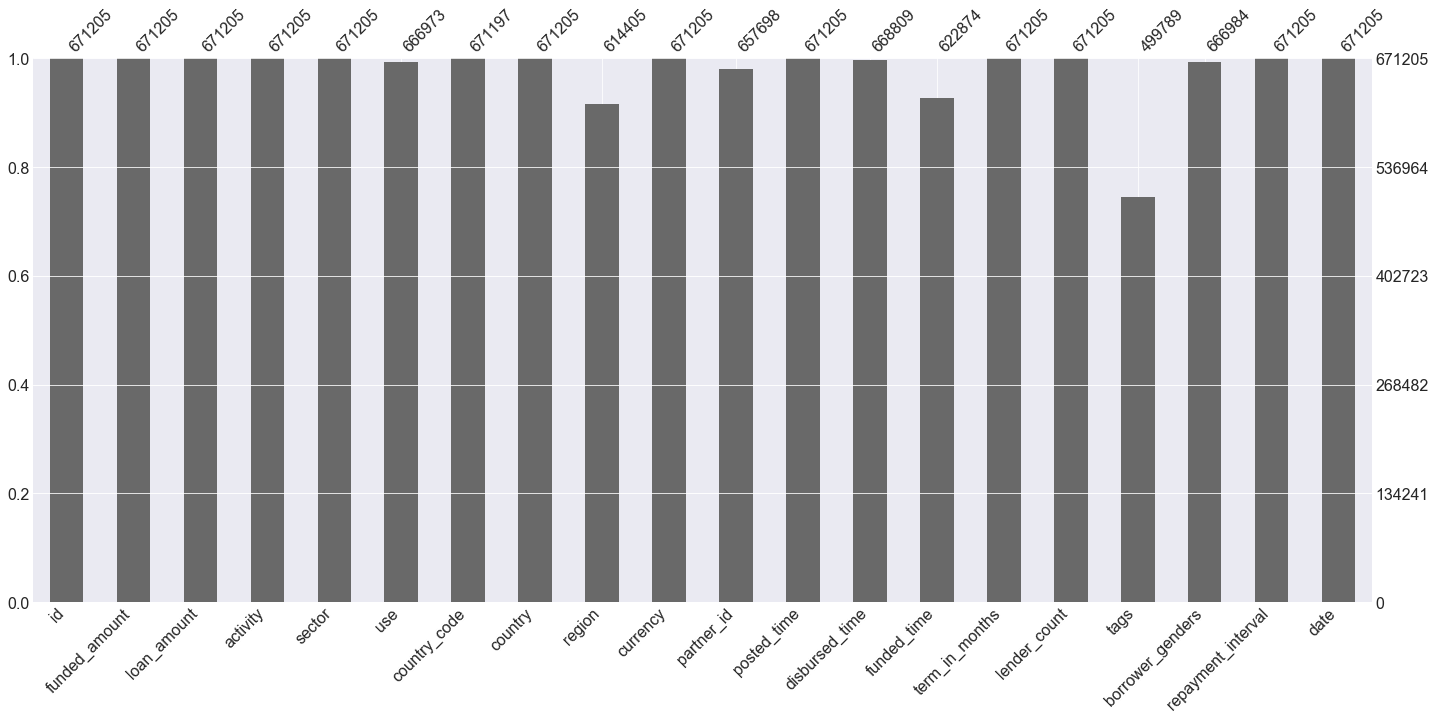

In [14]:
msno.bar(df_kiva_loans)

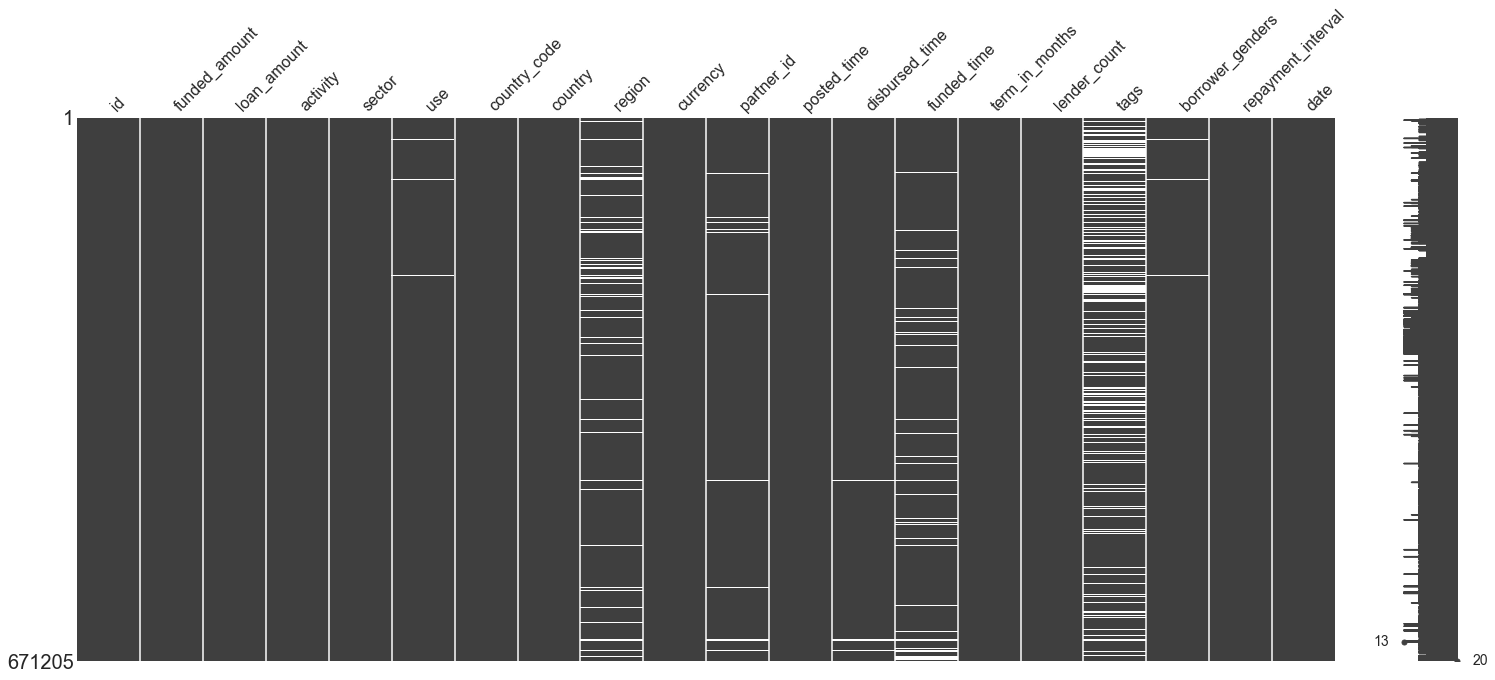

In [15]:
msno.matrix(df_kiva_loans)

Столбец тегов содержит много пропущенных значений. Также столбец с датой, когда запрашиваемая сумма была собрана на платформе Kiva, имеет около 8% пропусков. Это может означать либо то, что сумма пока не собрана, либо то, что она не была отражена в выгрузке корректно.

Изучение каждого атрибута датасета по отдельности и вывод ряда статистик для каждого из них.

In [16]:
df_kiva_loans.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [17]:
df_kiva_loans.describe(include=[np.number])

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [18]:
df_kiva_loans.describe(include=[np.object])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


**Первые очевидные результаты и выводы, которые мы можем сделать:**
* В этом датасете содержатся данные о **87** странах почти на всех континентах, где люди запрашивали помощь на финансирование проектов.
* Страной с самым большим количеством займов являются **Филиппины**.
* Наиболее популярной категорией является **сельское хозяйство**.
* Имеется довольно широкий разброс значений по ряду числовых атрибутов, таких как сумма займа, срок погашения кредита.
* В этом наборе данных **11 298** разных значений пола! Очевидно, что это невозможно. Надо обязательно попытаться понять, почему у нас такой набор значений. Помним, что для качественной аналитики нужно понимать анализируемый продукт. Поэтому ответ на этот вопрос очень важен.
* Среднее финансирование в мире составляет **786** долларов, а медианное финансирование — **450** долларов. Возможно, это означает, что существует небольшая доля заявок с крупными суммами. Стоит попытаться понять, кому и на какие нужды могли понадобиться такие суммы, а также то, насколько быстро деньги попали к заявителю после публикации заявки.
* Что ещё более важно: есть только 1298 различных дат, в которые были опубликованы заявки на кредиты. Если мы подсчитаем соотношение, то это означает, что в Kiva ежедневно выдаётся более **500** займов. Это даёт нам чёткое представление о том, насколько важна эта краудсорсинговая платформа и какое влияние она оказывает.


## 2.2. Пользователи Kiva

Демографических данные о людях, которые можно получить из выгрузки: где они живут, какой у них пол, для каких нужд они запрашивают финансирование.

### 2.2.1. Из каких стран эти люди?

Чтобы получить наиболее (статистически) значимые результаты, оставим только те страны, которые составляют не менее 0,5% сообщества Kiva.

In [19]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

In [20]:
countries

Philippines      160441
Kenya             75825
El Salvador       39875
Cambodia          34836
Pakistan          26857
Peru              22233
Colombia          21995
Uganda            20601
Tajikistan        19580
Ecuador           13521
Paraguay          11903
Nicaragua         11781
India             11237
Vietnam           10843
Nigeria           10136
Bolivia            8806
Lebanon            8792
Armenia            8631
Palestine          8167
Samoa              7396
Guatemala          7310
Rwanda             6735
Mali               6639
Honduras           6557
Indonesia          6214
United States      6093
Kyrgyzstan         5774
Togo               5749
Mexico             5741
Sierra Leone       5415
Tanzania           5219
Ghana              4374
Jordan             4167
Zimbabwe           4034
Madagascar         3821
Liberia            3682
Haiti              3618
Mozambique         3483
Name: country, dtype: int64

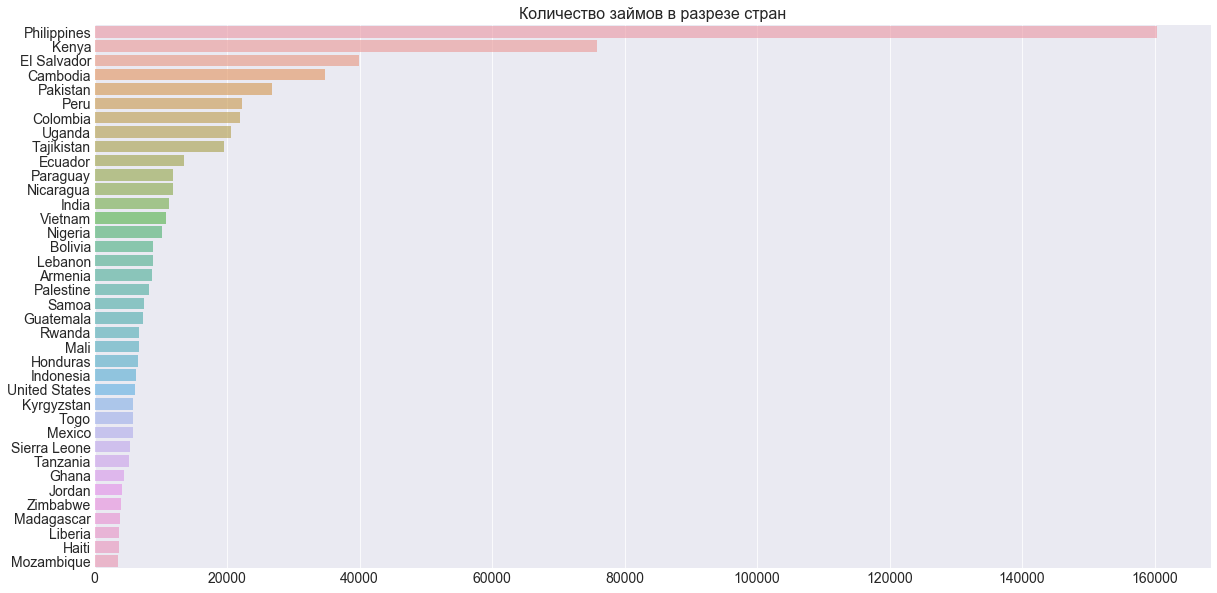

In [21]:
plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе стран", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

Чуть менее четверти всех займов приходится на Филиппины.
Возможно, потому что там широко распространены краткосрочные и небольшие займы. Это предположение будет проверено далее.

Можно также заметить, что в списке присутствует множество африканских стран, таких как Кения, Мали, Нигерия, Гана. Но вообще ни одной из стран Европейского Союза. Удивительным стало присутствие США в этом списке, поскольку уровень бедности в них не такой, как в других странах. 

### 2.2.2. Группировка данных по частям света

In [22]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [23]:
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()
df_mpi_grouped

,ISO,country,world_region,MPI
0,AFG,Afghanistan,South Asia,0.309853
1,ALB,Albania,Europe and Central Asia,0.000000
2,ARM,Armenia,Europe and Central Asia,0.000000
3,AZE,Azerbaijan,Europe and Central Asia,0.000000
4,BDI,Burundi,Sub-Saharan Africa,0.411800
...,...,...,...,...
97,VUT,Vanuatu,East Asia and the Pacific,0.000000
98,YEM,Yemen,Arab States,0.225952
99,ZAF,South Africa,Sub-Saharan Africa,0.000000
100,ZMB,Zambia,Sub-Saharan Africa,0.312200


In [24]:
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')
df_kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167


In [25]:
regions = df_kiva_loans['world_region'].value_counts()
regions_list = regions.index.to_list()
regions_list

['East Asia and the Pacific',
 'Sub-Saharan Africa',
 'Latin America and Caribbean',
 'Europe and Central Asia',
 'South Asia',
 'Arab States']

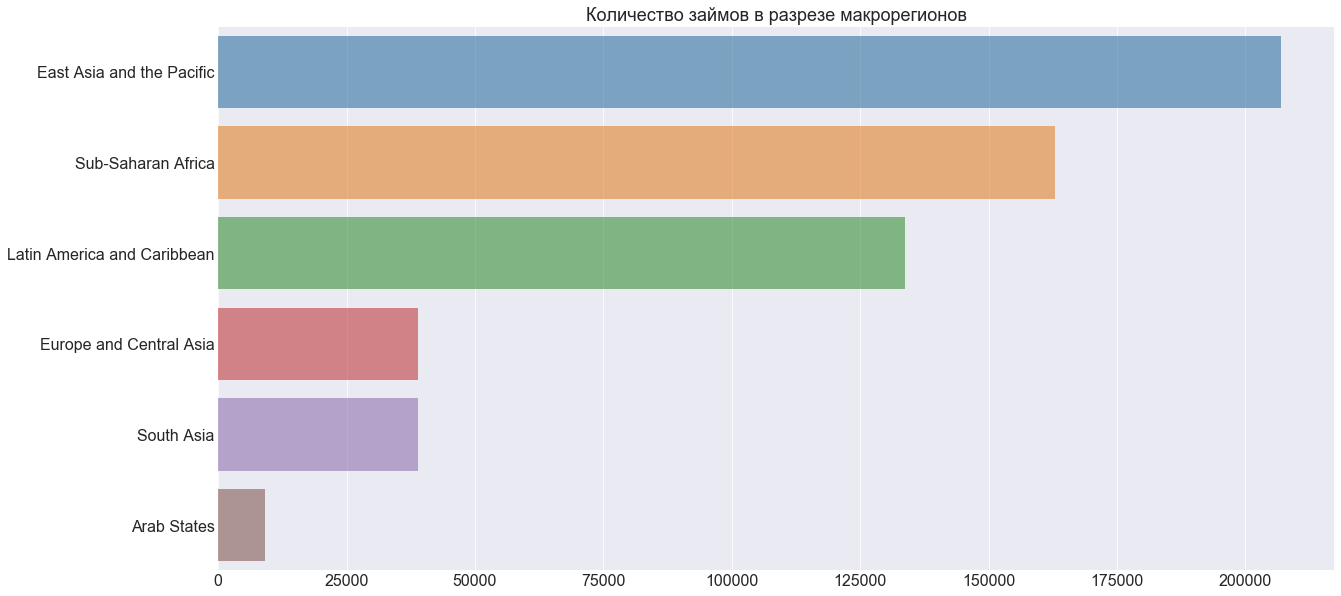

In [26]:
plt.figure(figsize=(20,10))
sns.barplot(y=regions.index, x=regions.values, alpha=0.6)
plt.title("Количество займов в разрезе макрорегионов", fontsize=18)
plt.tick_params(labelsize=16)
plt.show();

Очевидным становится наличие трёх лидеров и трёх аутсайдеров по количеству выданных займов.

Исходя из этого, можно предположить, что в трёх регионах-аутсайдерах либо нет острой потребности в присутствии Kiva (относительно богатые регионы), либо она пока не набрала те обороты, что мы видим в трёх регионах-лидерах. Присутствие региона «Арабские страны» свидетельствует в пользу первого предположения.

### 2.2.3 Люди какого пола обращаются за финансированием?

In [27]:
df_kiva_loans['borrower_genders'].value_counts()

female                                                                                                              426502
male                                                                                                                134710
female, female                                                                                                       12164
female, female, female                                                                                               11676
female, female, female, female                                                                                        9052
                                                                                                                     ...  
female, female, female, female, male, female, female, female, female, female, female, male, male, female                 1
female, female, male, female, female, female, female, female, male, female, female, male, female, female, female         1
male, male, male

Во многих займах заёмщик на самом деле не один человек, а группа людей, у которых есть общий проект. В наборе данных они перечислены как «женщина, женщина, женщина» или «мужчина, женщина». Это объясняет 12к полов, которые были обнаружены ранее, каждая такая комбинация считается отдельно.

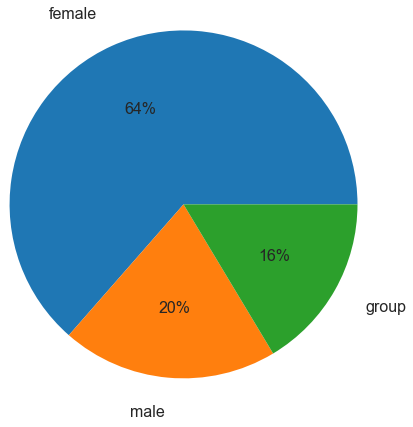

In [28]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders'] ]

borrowers = df_kiva_loans['borrower_genders'].value_counts()

plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)

Выясняется, что большинство заёмщиков — женщины, и это весьма неожиданно. 

**Что это может означать?**

Например то, что женщины используют Kiva, чтобы получить финансирование и развивать собственные проекты в странах (большинство из которых являются странами третьего мира), где традиционно женщинам это было сделать крайне тяжело.

### 2.2.4 В каких странах подавляющее большинство заёмщиков — женщины?

In [29]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]

df_gender_by_country = df_gender_by_country[['female', 'male', 'group']]

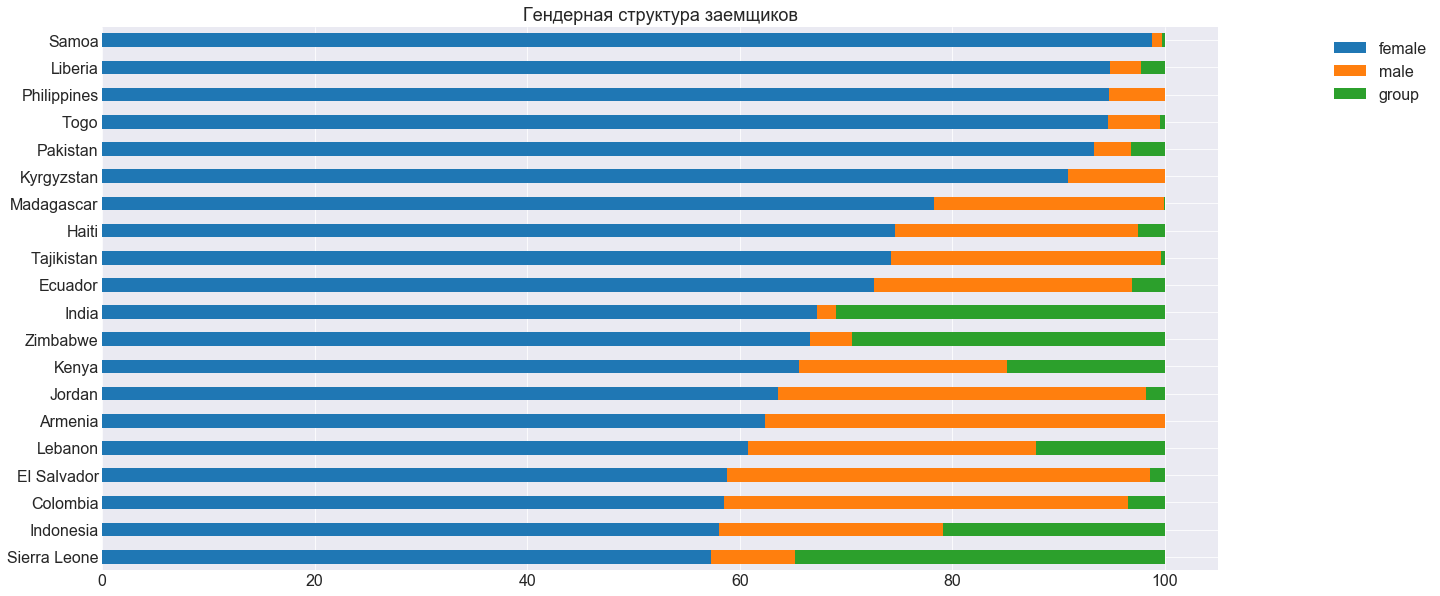

In [30]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=
            16)
plot.set(ylabel=None, xlabel=None)
plt.show()

**С чем может быть связана преобладающая доля женщин в структуре заёмщиков в разрезе стран?**

Например, в связи с направлениями, традиционно ассоциирующимися с женщинами: различного рода точки общественного питания и закусочные, магазины одежды и товаров для дома, бытовые услуги, выращивание сельскохозяйственных культур

Также можем отметить наличие в списке стран с преобладающей религией ислам, в которых женщине пока, к сожалению, отводится второстепенная роль в принятии решений. 
Kiva позволяет получать бОльшие возможности и перспективы в тех регионах, где ранее это было вряд ли доступно.

### 2.2.5 Поиск стран в которых среди заемщиков преобладают мужчины или группы их нескольких человек

In [31]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['male', 'female'])[-20:]

df_gender_by_country = df_gender_by_country[['male', 'female', 'group']]

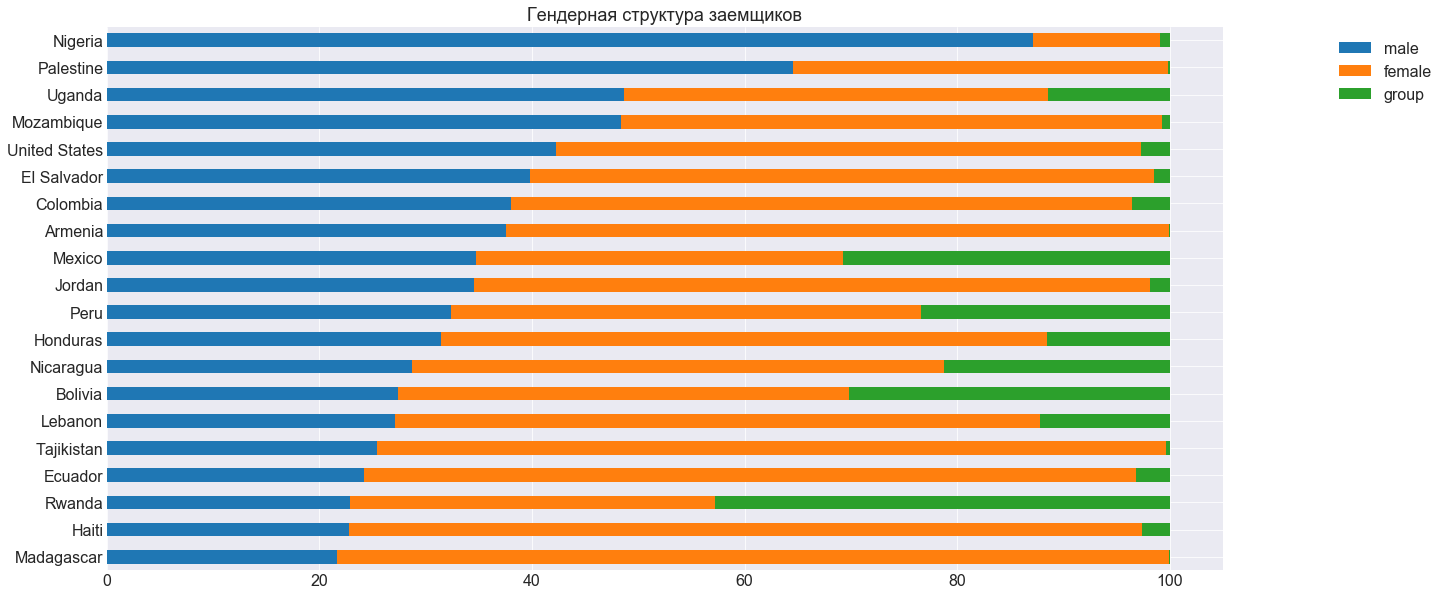

In [32]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

In [33]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['group', 'male'])[-20:]

df_gender_by_country = df_gender_by_country[['group', 'male', 'female']]

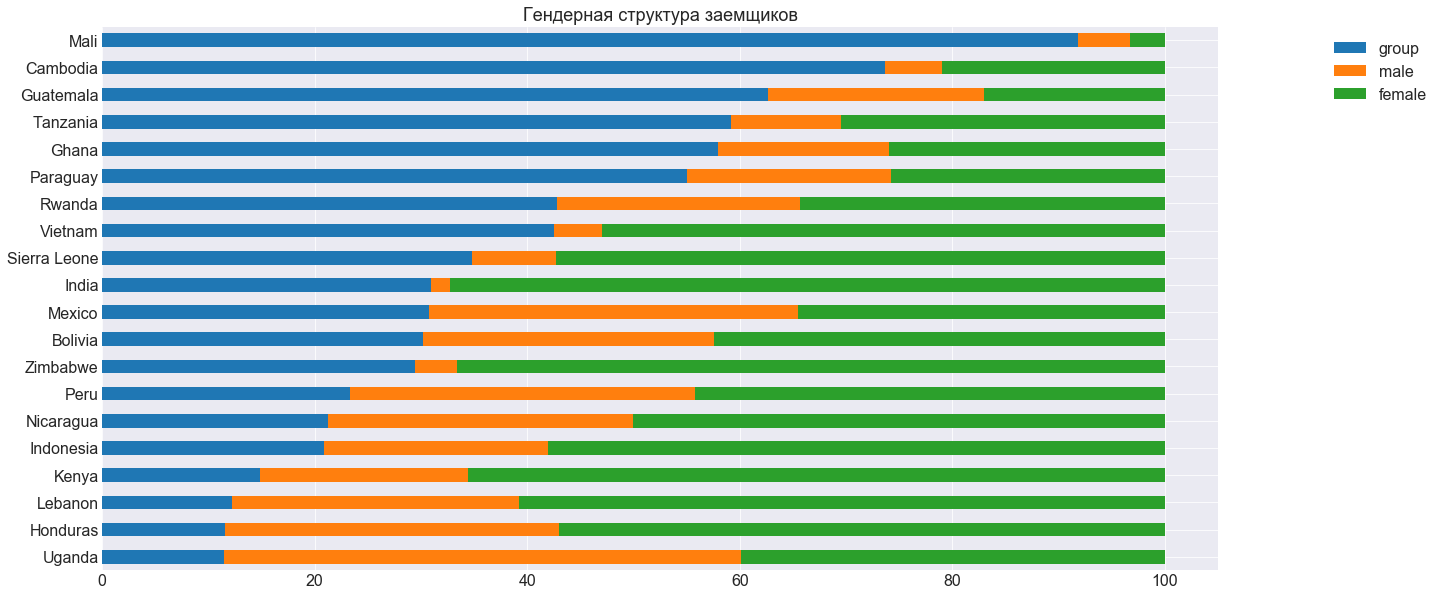

In [34]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

### 2.2.6 Зависимость пола заёмщика от региона планеты, сектора экономики

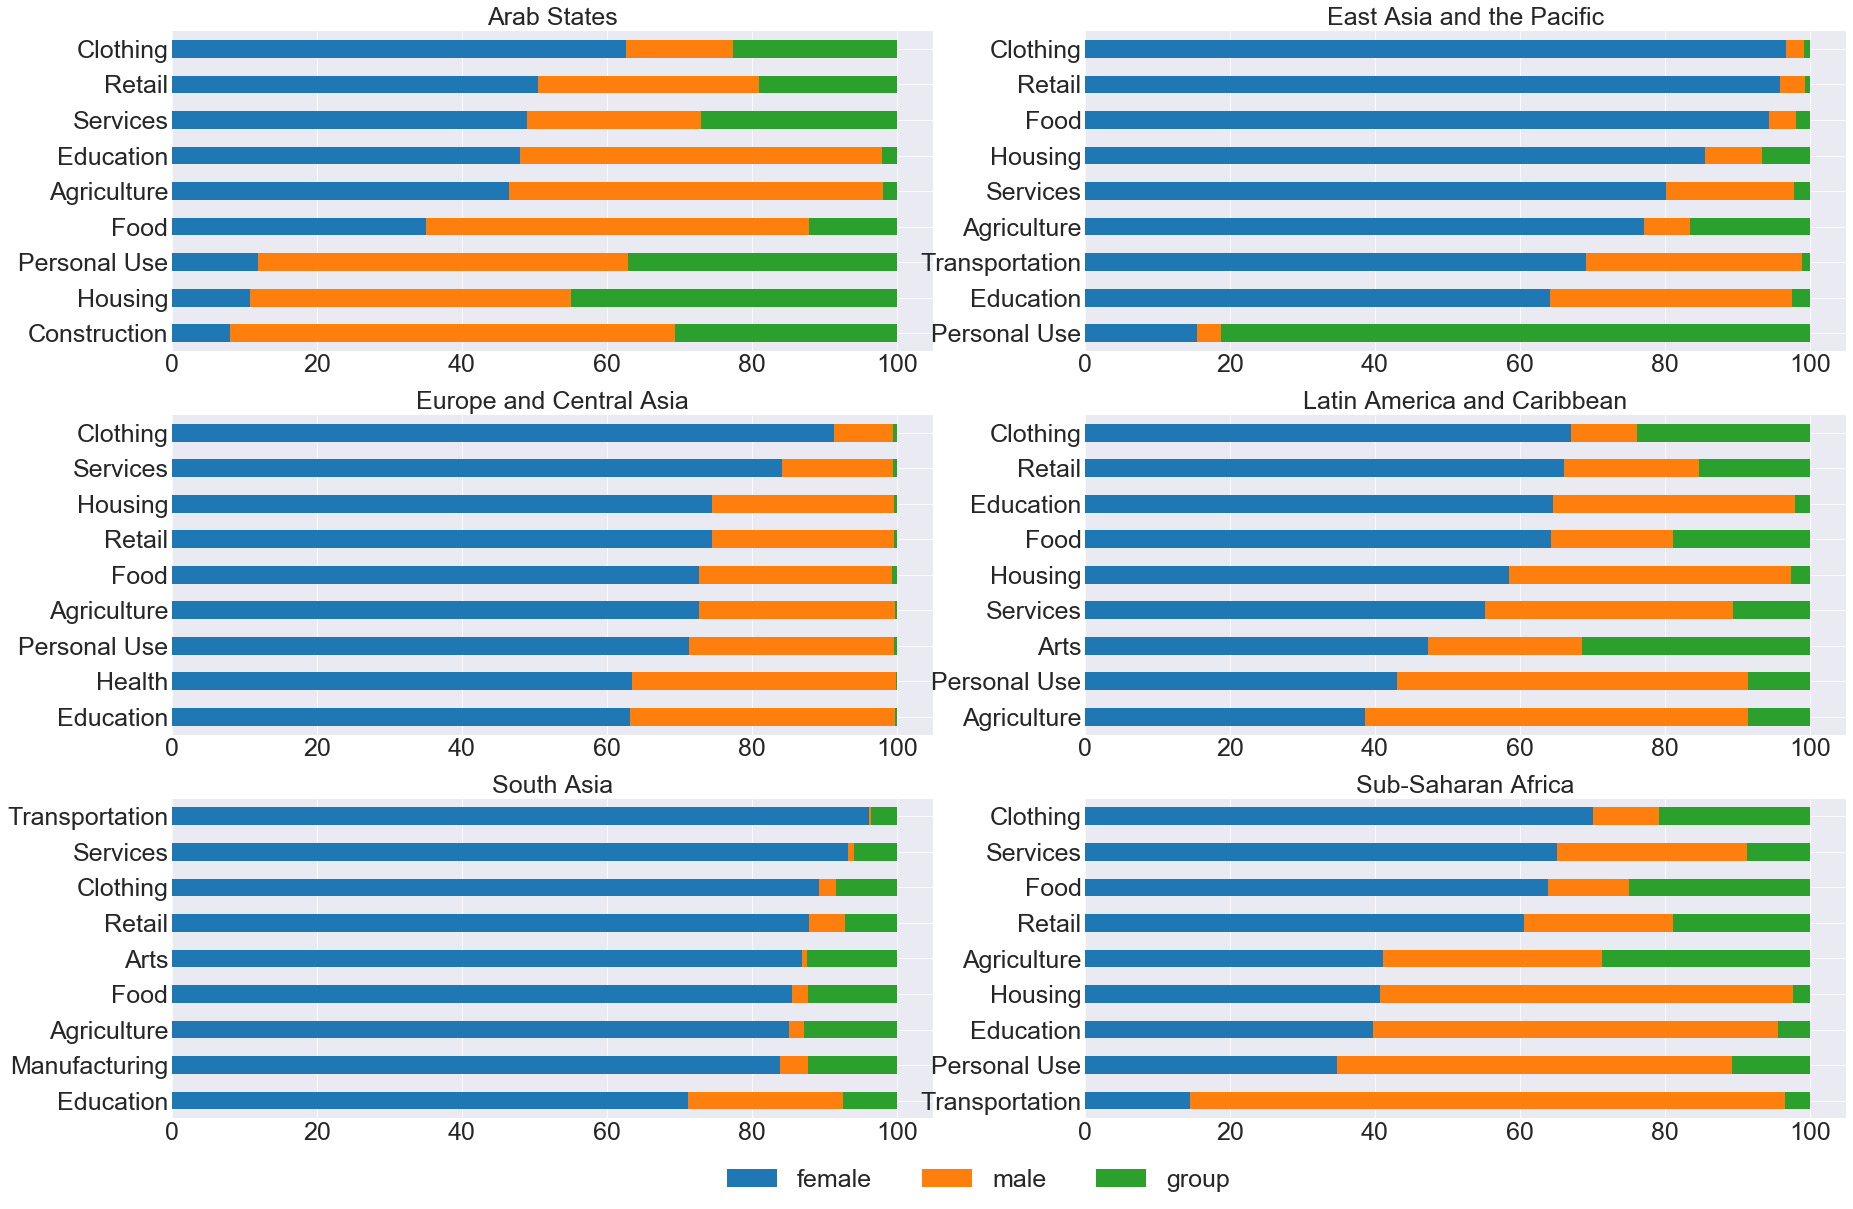

In [95]:
df_kiva_loans_by_borrower_genders = df_kiva_loans_trimmed.groupby('borrower_genders')
df_kiva_loans_male = df_kiva_loans_by_borrower_genders.get_group('male')
df_kiva_loans_female = df_kiva_loans_by_borrower_genders.get_group('female')
df_kiva_loans_group = df_kiva_loans_by_borrower_genders.get_group('group')


fig,axes = plt.subplots(3,2, sharex=False, squeeze=False, figsize=(30,20))

for ax,q in zip(axes.ravel(), range(len(df_kiva_loans['world_region'].value_counts().index.to_list()))):
    
    df_kiva_loans_w_s = list(df_kiva_loans.groupby(['world_region', 'sector'])\
     .sum()\
     .groupby(['world_region']))[q][1]\
     .sort_values('loan_amount', ascending = False)\
     .index.to_list()

    list_sectors_ordered = []
    for world_region, sector in df_kiva_loans_w_s:
        list_sectors_ordered.append(sector)
    list_sectors_ordered

    loans_by_world_region = list(df_kiva_loans.groupby('world_region'))[q][1]
    loans_by_world_region_sorted = loans_by_world_region[loans_by_world_region['sector']\
                                                         .isin(list_sectors_ordered[:9])]

    df_gender_by_w_r_sector = loans_by_world_region_sorted\
        .groupby(['sector', 'borrower_genders'])['borrower_genders']\
        .count()\
        .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
        .unstack('borrower_genders')\
        .fillna(0)\
        .sort_values(by=['female', 'male'])\
        [['female', 'male', 'group']]
    
    df_gender_by_w_r_sector.plot.barh(stacked=True, ax=ax, fontsize=25)
    
    ax.set_title(list(df_kiva_loans.groupby('world_region'))[q][0], fontsize=25)  
    ax.yaxis.label.set_visible(False)
    ax.legend().set_visible(False)

ax.legend(ncol=3, bbox_to_anchor=(-0.5, -0.3), loc='lower left', fontsize=25)

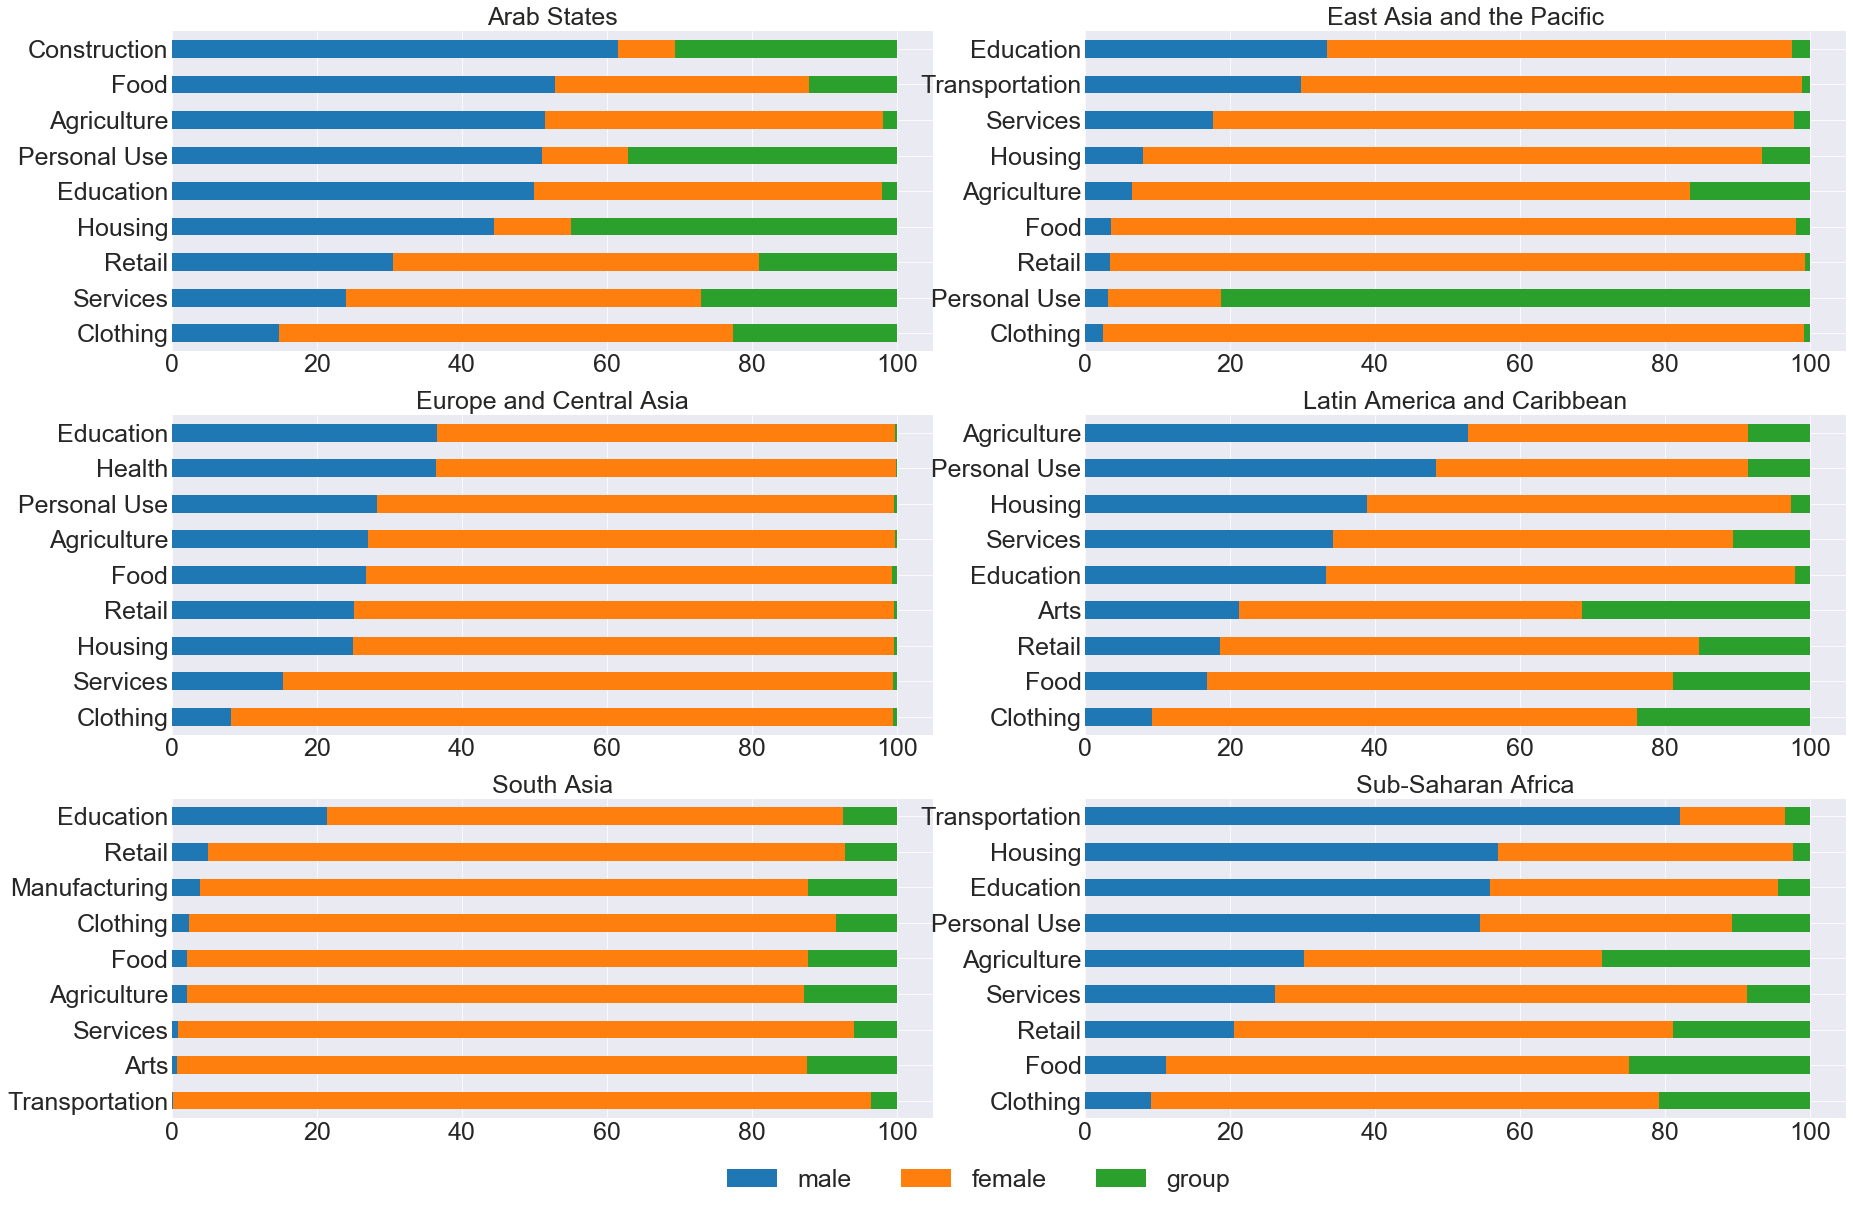

In [96]:
fig,axes = plt.subplots(3,2, sharex=False, squeeze=False, figsize=(30,20))

for ax,q in zip(axes.ravel(), range(len(df_kiva_loans['world_region'].value_counts().index.to_list()))):
    

    df_gender_by_w_r_sector = loans_by_world_region_sorted\
        .groupby(['sector', 'borrower_genders'])['borrower_genders']\
        .count()\
        .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
        .unstack('borrower_genders')\
        .fillna(0)\
        .sort_values(by=['male', 'female'])\
        [['male', 'female', 'group']]
    
    df_gender_by_w_r_sector.plot.barh(stacked=True, ax=ax, fontsize=25)
    
    ax.set_title(list(df_kiva_loans.groupby('world_region'))[q][0], fontsize=25)  
    ax.yaxis.label.set_visible(False)
    ax.legend().set_visible(False)

ax.legend(ncol=3, bbox_to_anchor=(-0.5, -0.3), loc='lower left', fontsize=25)

-  К регионам, пользователи которых в большинетсве представлены женщинами, относятся: Южная, восточная Азия, Океания, Европа и Центральная Азия. Наиболее популярны сектора экномики среди женщин это: швейная, пищевая промышленности, розничная торговля и сфера обслуживания. Также популярна сфера образования.  Почти во всех регионах на первом месте стоит швейная промышленность.
- Среди мужчин Kiva наиболее популярен в Арабских странах и в Африке. В половине регионов на первом месте среди мужчин стоит образование. Так же следует выделить сфепру жилищного строительства, сельского хозяйства и личного использования.

## 2.3. Количество займов
Теперь посмотрим, для чего людям нужны кредиты и какие суммы они просят. 

### 2.3.1. В разрезе секторов

Секторы экономики. 
В сводке выше было 15 уникальных секторов. Рассмотрим, как обстоят дела в каждом из них.

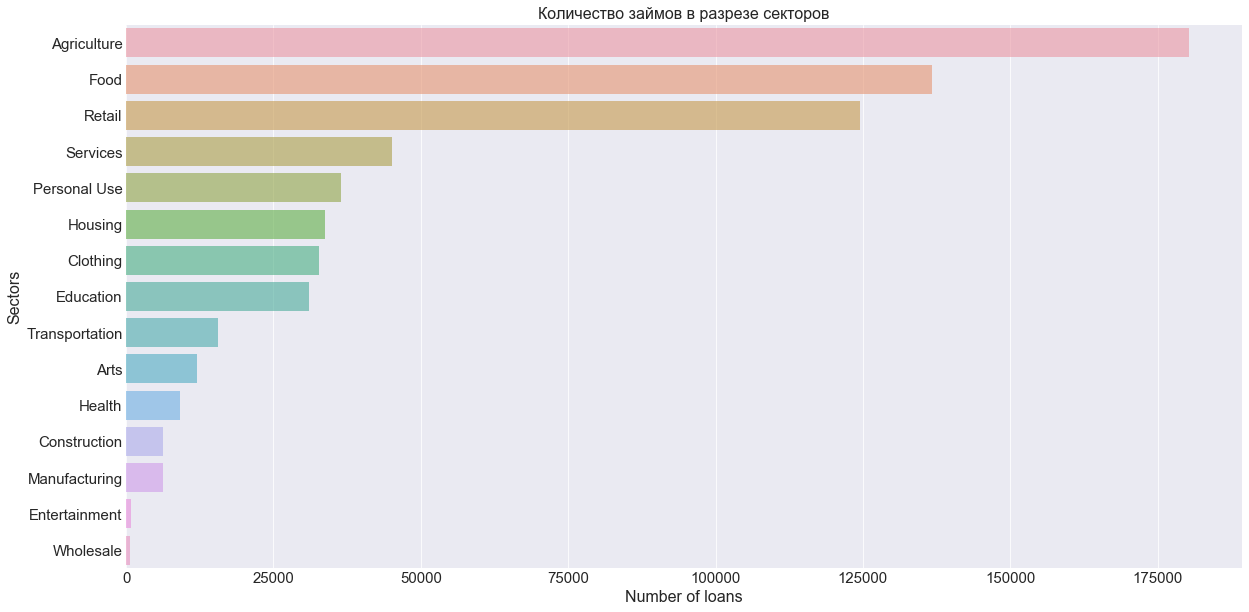

In [35]:
sectors = df_kiva_loans['sector'].value_counts()

plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе секторов", fontsize=16)
plt.xlabel('Number of loans', fontsize=16)
plt.ylabel("Sectors", fontsize=16)
plt.tick_params(labelsize=15)

sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.show()

Самым доминирующим сектором является **сельское хозяйство**, за ним следуют **пищевая промышленность** и **торговля**.
Это неудивительно, учитывая список стран, которые интенсивно используют Kiva. Например, беглый осмотр первых страниц сайта свидетельствует о таких примерах: покупка качественных семян и удобрений для использования на ферме и в садоводческом хозяйстве, закупка свежей еды, злаков, рыбы, овощей для обеспечения работы предприятия общественного питания. Можно сделать ряд выводов о структуре экономик этих стран, свидетельствующих о том, что это сугубо развивающиеся страны, полагающиеся преимущественно на аграрную отрасль.

Важно отметить, что кредиты на **личные нужды** также занимают значительную долю. Это означает, что есть люди, которые используют Kiva, потому что они крайне нуждаются.

Гораздо меньшие доли занимают **строительство**, **производство**, а также сфера **развлечений** и **оптовой торговли**.

### 2.3.2. В разрезе видов деятельности

Более подробную версия и подсчёт для **видов деятельности**.

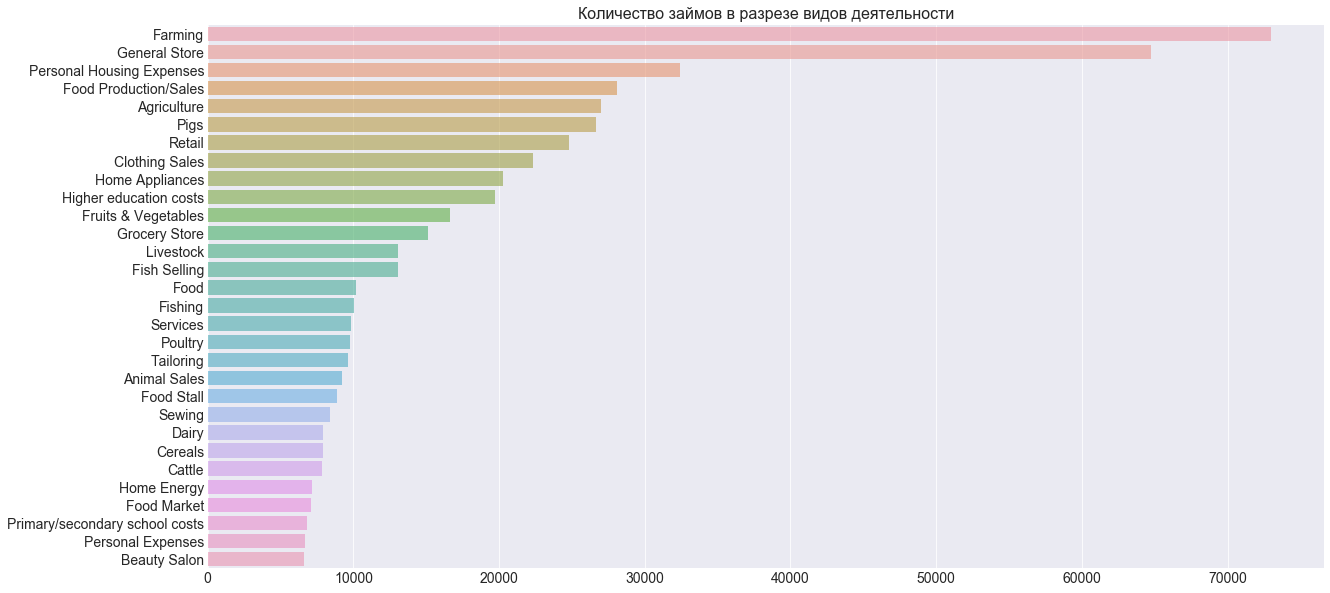

In [36]:
activities = df_kiva_loans['activity'].value_counts().head(30)

plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе видов деятельности", fontsize=16)
plt.tick_params(labelsize=14)

sns.barplot(y=activities.index, x=activities.values, alpha=0.6)
plt.show();

Детализация по видам деятельности подтверждает наши наблюдения. В лидерах фермерство, розничные магазины, домашнее хозяйство, а также расходы на жильё.

**Влияние такого атрибута займа, как Количество кредиторов (lender_count) на суммы и сроки займов**

In [84]:
df_lender_count = df_loans_dates.copy()
df_lender_count['lender_count_group'] = pd.cut(df_loans_dates.lender_count, range(0, 276, 25))

df_lender_count_group = df_lender_count.groupby('lender_count_group')\
    .agg({'loan_amount' : 'median', 'term_in_months' : 'median'}).dropna().reset_index()
    
df_lender_count_group.sort_values('lender_count_group', ascending=False, inplace=True)
df_lender_count_group

,lender_count_group,loan_amount,term_in_months
9,"(250, 275]",4000.0,24.0
8,"(225, 250]",4000.0,18.0
7,"(175, 200]",3750.0,24.0
6,"(150, 175]",4262.5,14.0
5,"(125, 150]",4000.0,13.0
4,"(100, 125]",3275.0,14.0
3,"(75, 100]",2700.0,14.0
2,"(50, 75]",1900.0,14.0
1,"(25, 50]",1050.0,14.0
0,"(0, 25]",350.0,11.0


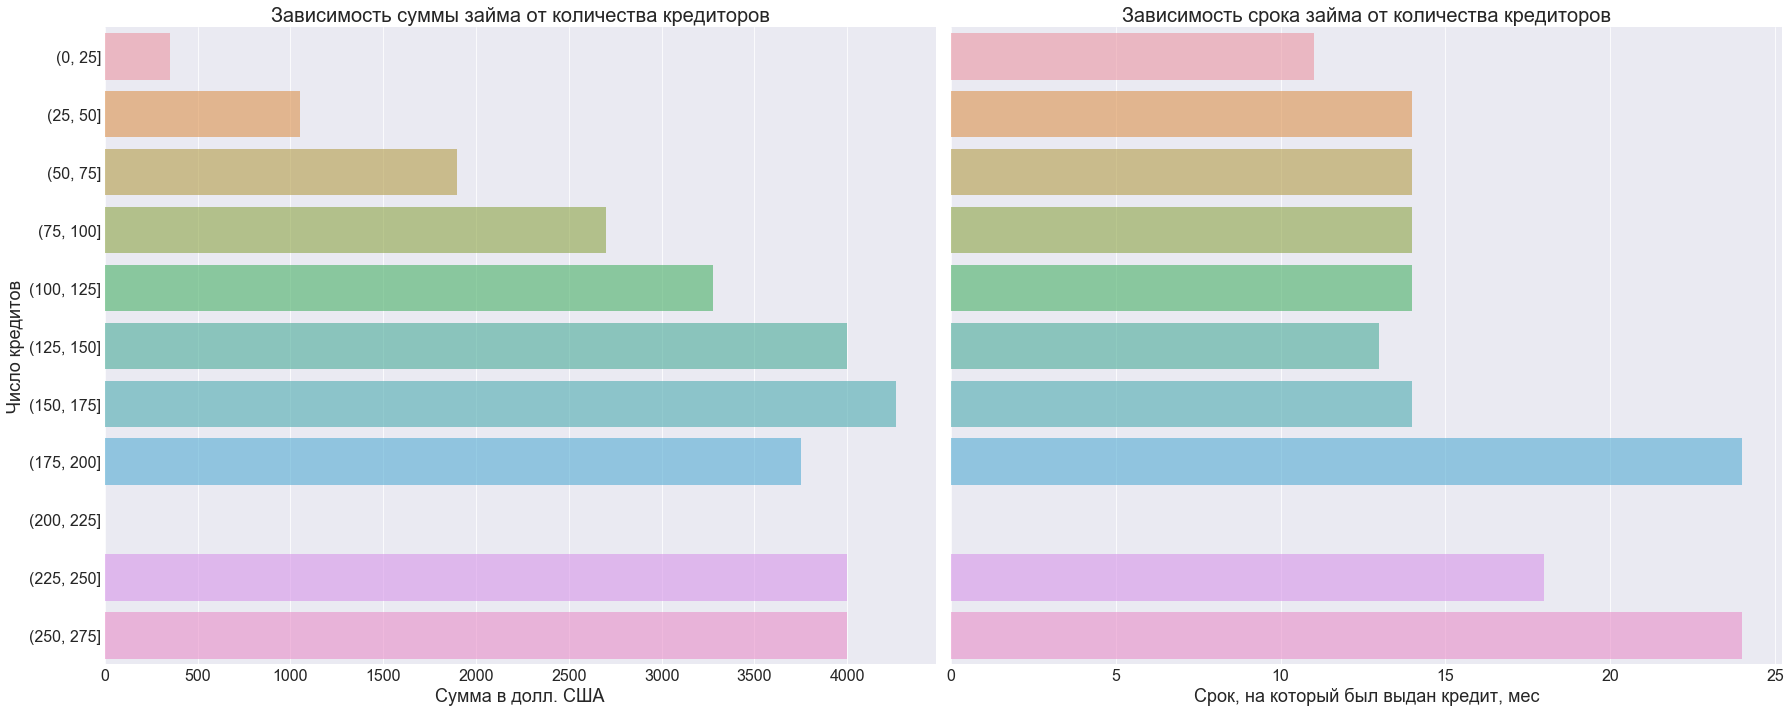

In [85]:
f,ax=plt.subplots(1, 2, sharey=True, figsize=(25,10))

sns.barplot(x=df_lender_count_group['loan_amount'], y=df_lender_count_group['lender_count_group'], ax=ax[0], alpha=0.6)
ax[0].set_title('Зависимость суммы займа от количества кредиторов', fontsize=20)
ax[0].set_xlabel('Сумма в долл. США', fontsize=18)
ax[0].set_ylabel('Число кредито', fontsize=18)
ax[0].tick_params(labelsize=16)

sns.barplot(x=df_lender_count_group['term_in_months'], y=df_lender_count_group['lender_count_group'],  ax=ax[1], alpha=0.6)
ax[1].set_title('Зависимость срока займа от количества кредиторов', fontsize=20)
ax[1].set_xlabel('Срок, на который был выдан кредит, мес', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

Выводы: 
* В целом, сумма займа пропорциональна количеству кредиторов. Это говорит о том, что подавляющее большинство кредиторов вносят деньги в kiva небольшими суммами.
* зависимсоть срока кредита от количества кредиторов прослеживается лишь при количестве кредиторов больше 150.

### 2.3.3. Рейтинг целевого назначения займа

In [37]:
activities = df_kiva_loans['use'].value_counts().head(25)
activities

to buy a water filter to provide safe drinking water for their family.                                                          5217
to buy a water filter to provide safe drinking water for her family.                                                            4082
To buy a water filter to provide safe drinking water for their family.                                                          2141
to build a sanitary toilet for her family.                                                                                      1708
to build a sanitary toilet for her family                                                                                       1599
to buy ingredients for her food production business                                                                             1419
to purchase more groceries to sell.                                                                                             1409
to buy feed and other supplies to raise her pigs.                    

В лидерах по целевому назначению займов — вещи, удовлетворяющие базовые человеческие потребности, такие как покупка фильтра для воды, оборудование септика, светильники на солнечных батареях.

### 2.3.4. Наиболее популярные виды деятельности

Сравнение наиболее популярных направлений займов.
Для этого сгруппируем займы по признакам **sector, activity** и посмотрим на топ-10 в каждой группе.

In [38]:
loans_by_activity_sector = \
    df_kiva_loans[df_kiva_loans['sector'].isin(sectors[:9].index.values)]\
    .groupby(['sector', 'activity'])['loan_amount']\
    .count()\
    .reset_index()

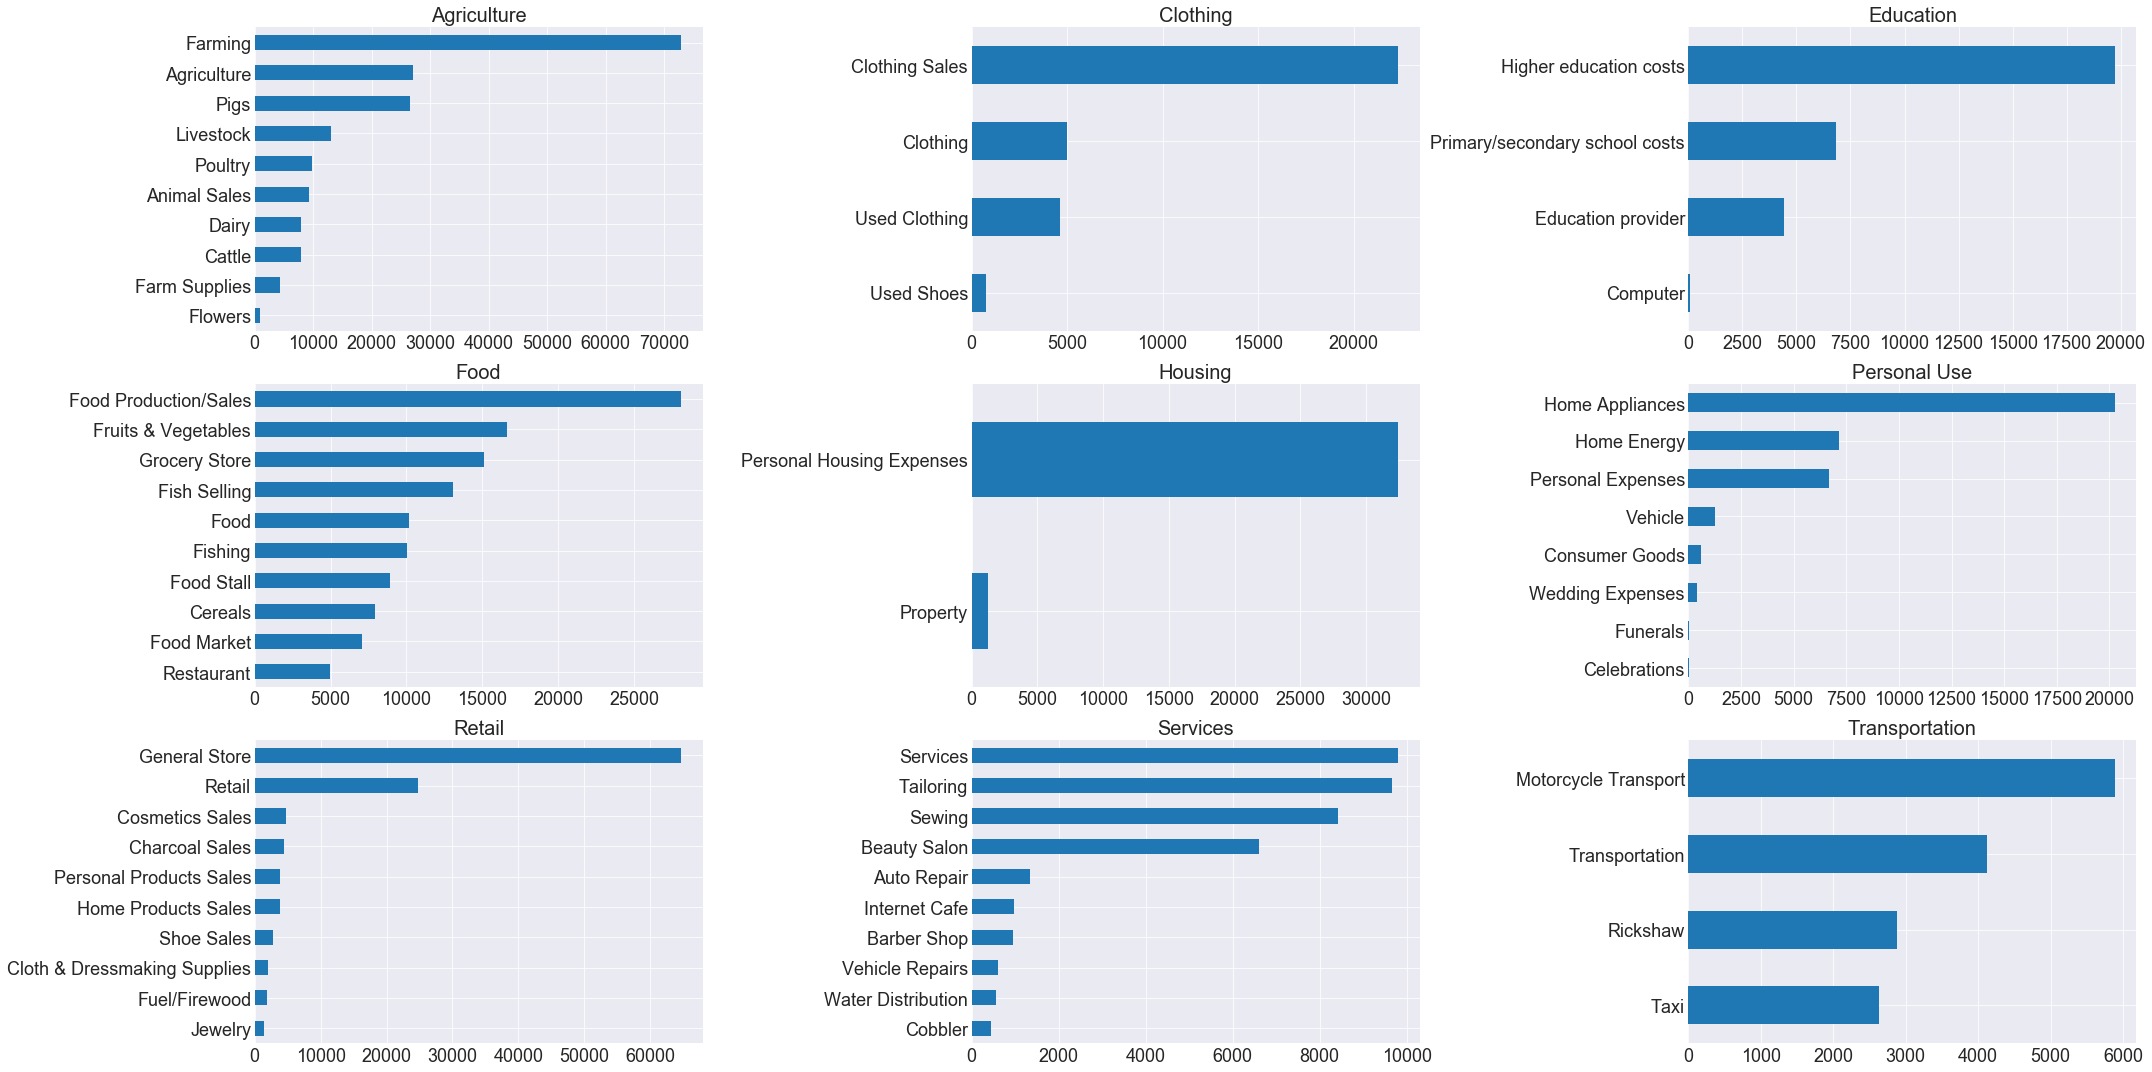

In [39]:
fig,axes = plt.subplots(3,3, sharex=False, squeeze=False, figsize=(30,15))

for ax,q in zip(axes.ravel(), loans_by_activity_sector.sector.unique()):
    tmp_df = loans_by_activity_sector[loans_by_activity_sector.sector.eq(q)]\
                .dropna()\
                .sort_values(by='loan_amount')[-10:]
    ax.set_title(q, fontsize=20)  
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    
    tmp_df.plot.barh(x='activity', ax=ax, legend=None, fontsize=18)

In [40]:
loans_by_activity_sector.sector.unique()

array(['Agriculture', 'Clothing', 'Education', 'Food', 'Housing',
       'Personal Use', 'Retail', 'Services', 'Transportation'],
      dtype=object)

Основной вывод, который мы можем сделать: львиная доля займов направлены на деятельность с невысокой добавленной стоимостью — **сельское хозяйство, розничная торговля, сервис**. То есть деятельность, в которой минимально задействованы смежные сектора экономики и невысок потенциал создания дополнительных рабочих мест и продуктов внутри страны, в отличие от, например, **производственных предприятий, строительства, ремесленных мастерских, лёгкой промышленности**.

И тем не менее не может не радовать присутствие такого направления, как, например, **образование**: финансирование обучения школах и университетах, организация и подготовка курсов и образовательных программ.

## 2.4. Объём финансирования

### 2.4.1. Распределение суммы займа

Не менее важную информацию могут дать абсолютные значения займов, которые люди в разных странах запрашивают на реализацию своих целей.

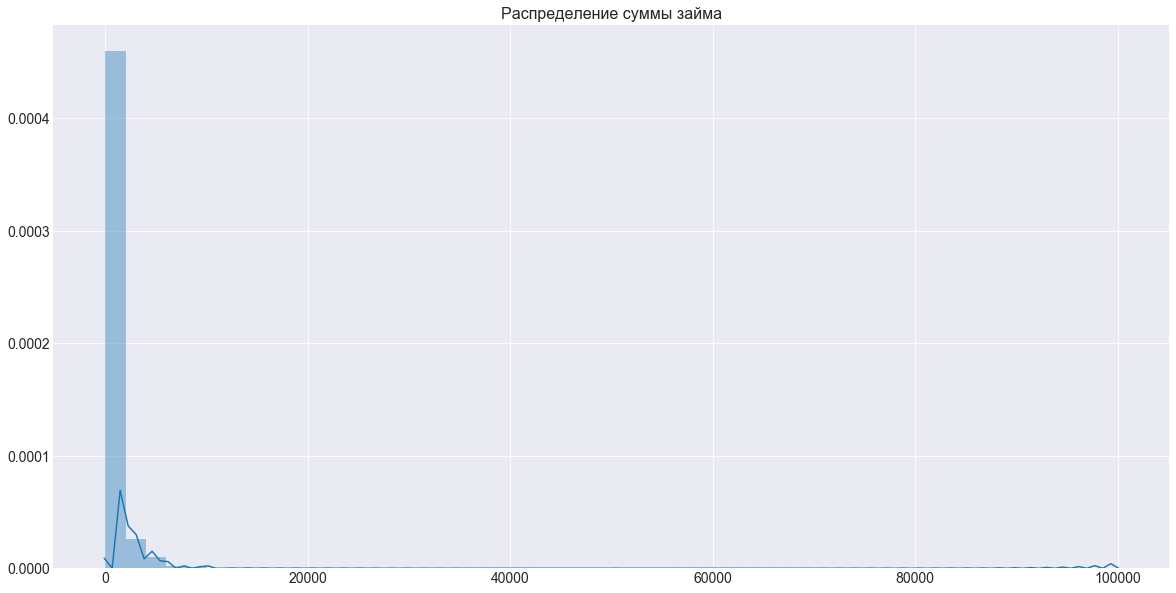

In [41]:
plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа", fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df_kiva_loans['loan_amount'], axlabel=False)
plt.show()

Налицо наличие ряда предельных значений (выбросов). Они искажают распределение, нужно усечь данные (по правилу трех сигм).

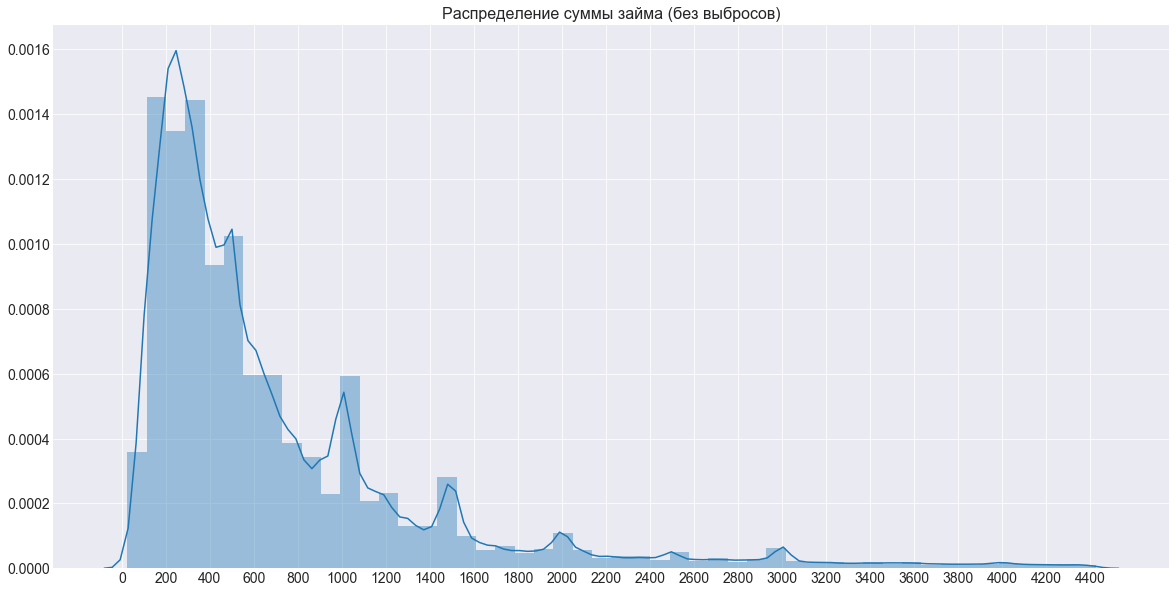

655853


In [42]:
# Наблюдаемое отклонение от среднего
dev = (df_kiva_loans['loan_amount']-df_kiva_loans['loan_amount'].mean()).abs()
# Стандартное отклонение
std = df_kiva_loans['loan_amount'].std()
# Фильтруем исходный набор данных
df_kiva_loans_trimmed = df_kiva_loans[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа (без выбросов)", fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_kiva_loans_trimmed['loan_amount']+1), 200))

sns.distplot(df_kiva_loans_trimmed['loan_amount'], axlabel=False)
plt.show()
print(df_kiva_loans_trimmed.shape[0])

* Большинство ссуд составляют от 100 до 600 долларов США с пиковыми значениями в районе 200 и 400 долларов США.
* Сумма, естественно, уменьшается, но мы можем заметить наличие её нескольких пиков в 1000 (наиболее чёткий), 1500 и 2000 долларов США. Можно предположить, что есть определённый класс проектов, которые являются более «сложными» и финансируются бОльшими суммами.

### 2.4.2. Суммы займа в разрезе секторов

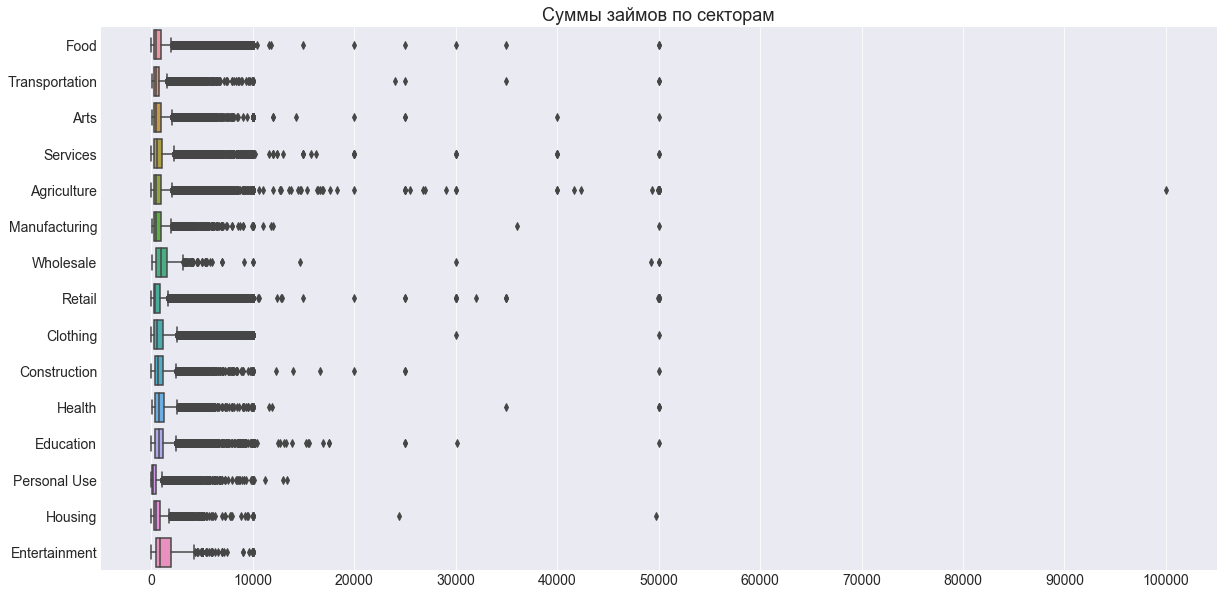

In [43]:
plt.figure(figsize=(20,10))
plt.title("Суммы займов по секторам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 10000))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="sector", data=df_kiva_loans).set(ylabel=None, xlabel=None)
plt.show()

Для любого сектора есть значения-выбросы. И почти для всех секторов, кроме **личные нужды, индустрия развлечений**, — займы доходят до суммы в районе $50.000.

Посмотрим на "большие" займы

In [44]:
df_kiva_loans.columns

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date', 'ISO', 'world_region', 'MPI'],
      dtype='object')

In [45]:
df_kiva_loans_20 = df_kiva_loans[(df_kiva_loans['funded_amount']) >= 20000].reset_index()

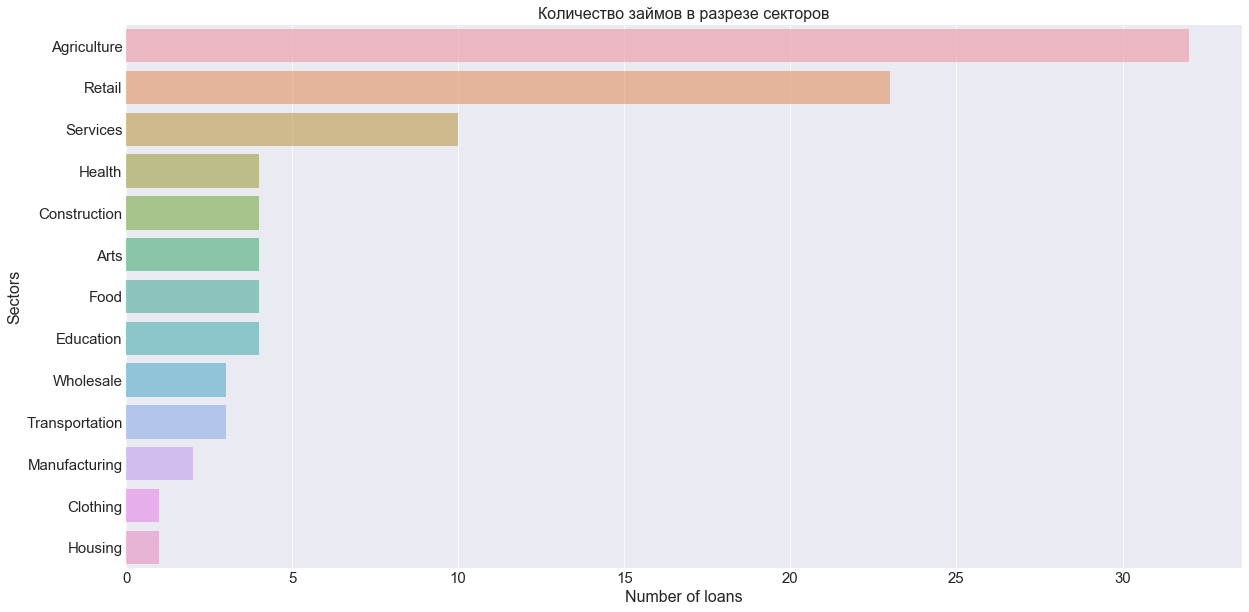

In [46]:
sectors = df_kiva_loans_20['sector'].value_counts()

plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе секторов", fontsize=16)
plt.xlabel('Number of loans', fontsize=16)
plt.ylabel("Sectors", fontsize=16)
plt.tick_params(labelsize=15)

sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.show()

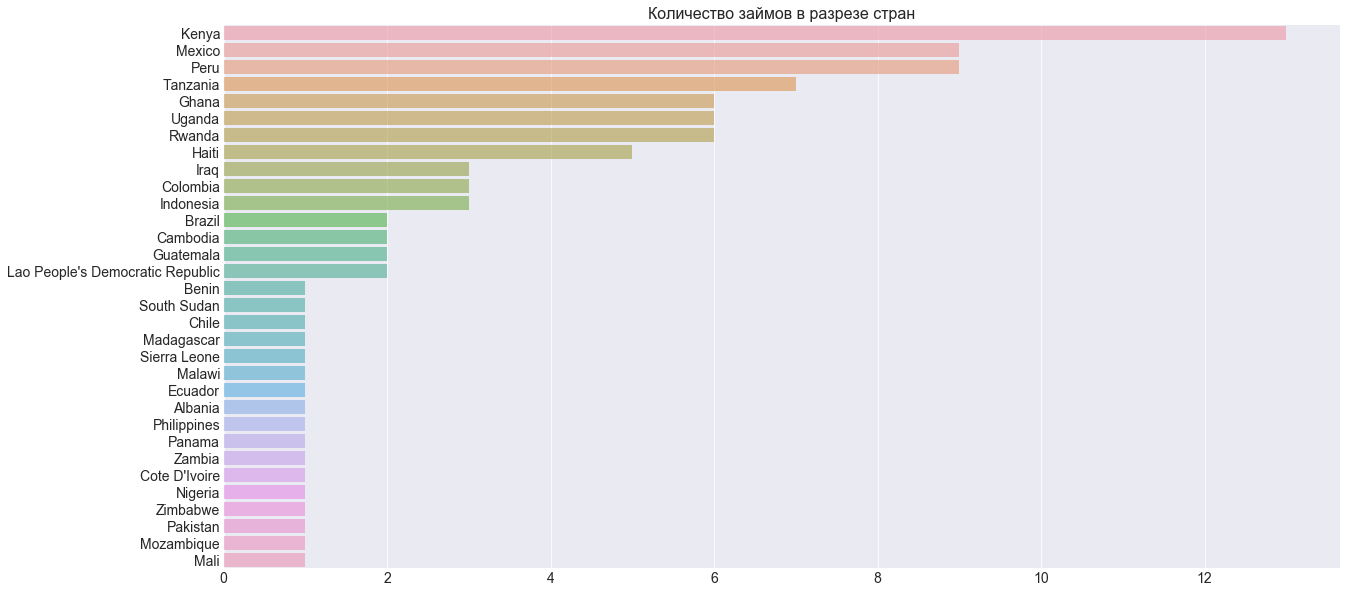

In [47]:
countries = df_kiva_loans_20['country'].value_counts()
list_countries = list(countries.index)

plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе стран", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

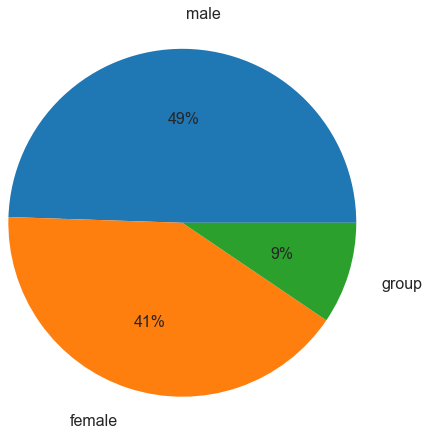

In [48]:
df_kiva_loans_20['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans_20['borrower_genders'] ]

borrowers = df_kiva_loans_20['borrower_genders'].value_counts()

plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)

Наибольшее количество займов по секторам занимают Аграрная сфера и сфера розничной торговли. Распределение количества займов по полам сильно отличается "дешевых" займов: половину уже занимают мужчины (против пятой части), женщины 41% (64% в общем датасете), и 9% (против 16%).

Средние и медианные значения суммы займа по секторам:

In [49]:
sector_mean_median = df_kiva_loans\
    .groupby(['sector'])['loan_amount']\
    .agg(median='median', mean='mean')\
    .sort_values(by='median', ascending=False)

sort_order = sector_mean_median.index.to_list()

sector_mean_median

,median,mean
sector,,
Wholesale,950.0,1569.716088
Entertainment,887.5,1673.674699
Education,725.0,998.565924
Health,725.0,1067.266616
Construction,700.0,1068.147735
Clothing,600.0,1139.237829
Services,550.0,1064.631148
Agriculture,500.0,793.490228
Housing,500.0,701.549020


А также график, после того как мы избавимся от выбросов:

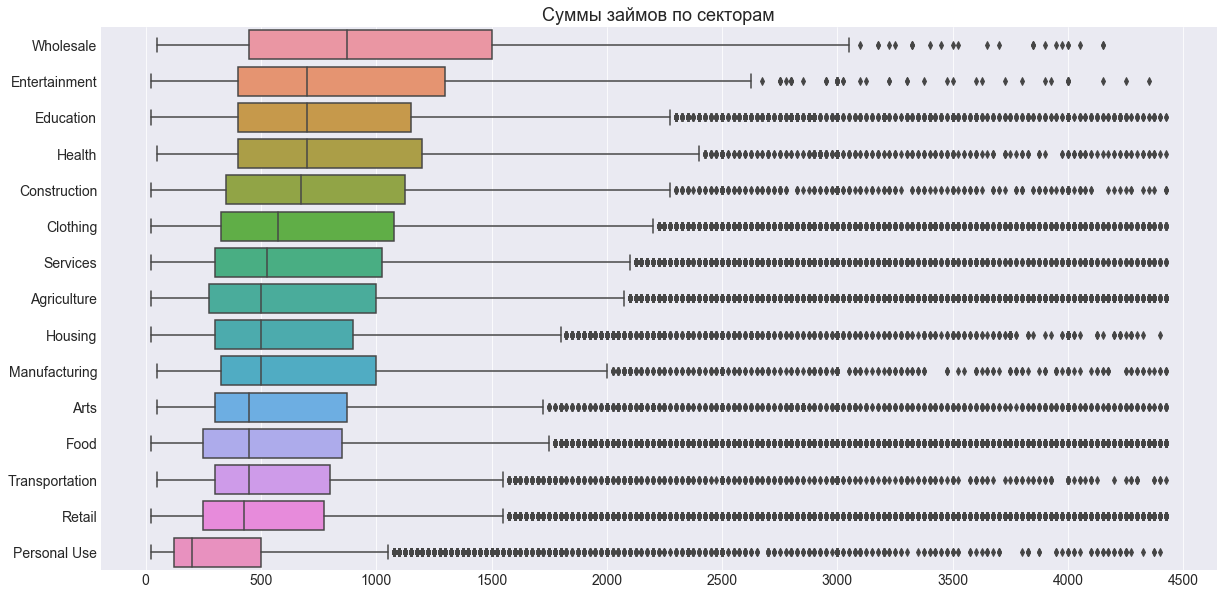

In [50]:
plt.figure(figsize=(20,10))
plt.title("Суммы займов по секторам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="sector", order=sort_order, data=df_kiva_loans_trimmed).set(ylabel=None, xlabel=None)
plt.show()

Из графика становится ясно, что медиана суммы заявок на **личные нужды** обладает наименьшим значением. Личные нужды включают предменты обихода и первой необходимости, обеспечение жилища энергией, теплом и водой. Именно эта группа заявок может свидетельствовать о случаях крайней нужды и бедности в различных странах.

На другой стороне графика сектора с самыми большими показателями медианы суммы займа: **оптовая торговля**, требующая значительнх затрат на закупку, что вполне логично; **образование** и **здравоохранение**, а также **сфера развлечений**.

### 2.4.3. Распределение по макрорегионам

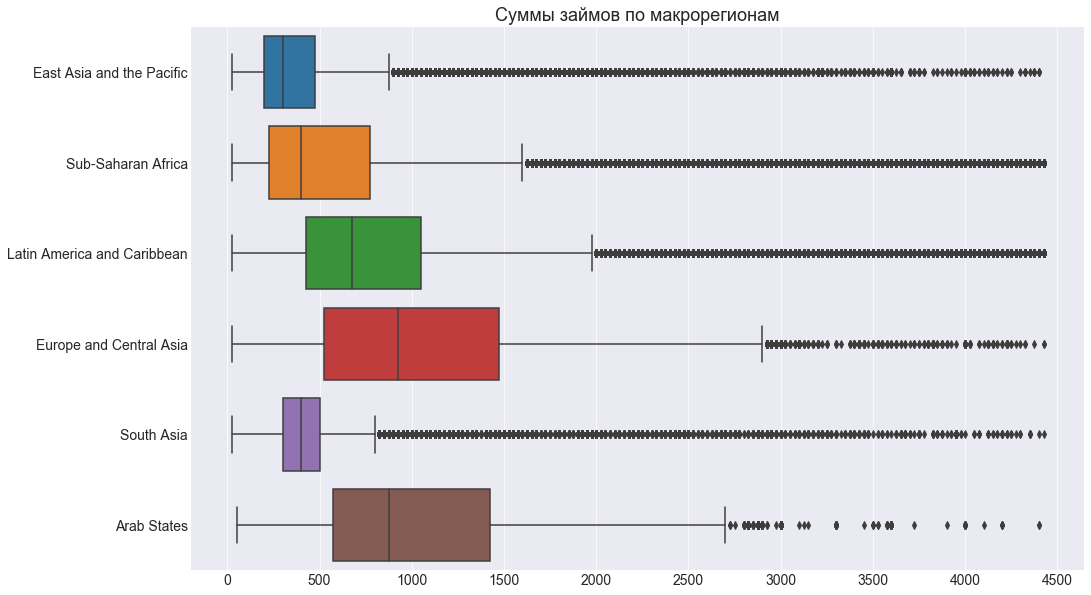

In [51]:
plt.figure(figsize=(16,10))
plt.title("Суммы займов по макрорегионам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="world_region", order=regions_list, data=df_kiva_loans_trimmed)\
    .set(ylabel=None, xlabel=None)
# plt.legend(loc=1, bbox_to_anchor=(1.15, 1), fontsize=16)
plt.show()

Регионы расположены в порядке убывания количества займов (в соответствии с графиком, полученным в п. 2.2.1).

Скорее всего, те регионы, в которых медианные значения ниже, в целом беднее и требуют финансирования короткими, небольшими, но частыми займами. Эту ситуацию мы и наблюдаем в регионе **Юго-Восточная Азия**, лидерами в котором являются **Филиппины** и **Камбоджа**.

Однако на этом графике мы можем заметить регион, который выбивается из последовательности, — **Южная Азия**, а в частности такие страны, как **Пакистан** и **Индия**. Вполне вероятно, что в этом регионе есть отличная площадка для расширения присутствия и поддержки со стороны сообщества Kiva.

### Связь между странами (макрорегионами), полом заёмщика и суммой заявки.

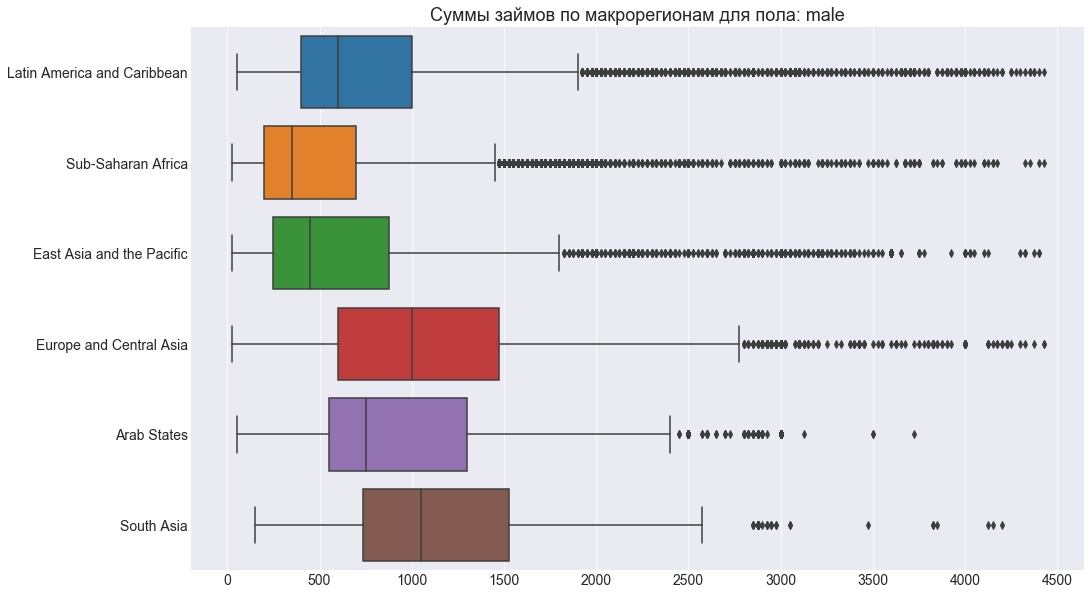

In [106]:
df_kiva_loans_trimmed_gender_data = list(df_kiva_loans_trimmed.groupby('borrower_genders'))[2][1]
df_kiva_loans_trimmed_gender_name = list(df_kiva_loans_trimmed.groupby('borrower_genders'))[2][0]

regions = df_kiva_loans_trimmed_gender_data['world_region'].value_counts().index.to_list()

plt.figure(figsize=(16,10))
plt.title("Суммы займов по макрорегионам для пола: {}".format(df_kiva_loans_trimmed_gender_name), fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="world_region", order=regions, data=df_kiva_loans_trimmed_gender_data)\
    .set(ylabel=None, xlabel=None)
plt.show()

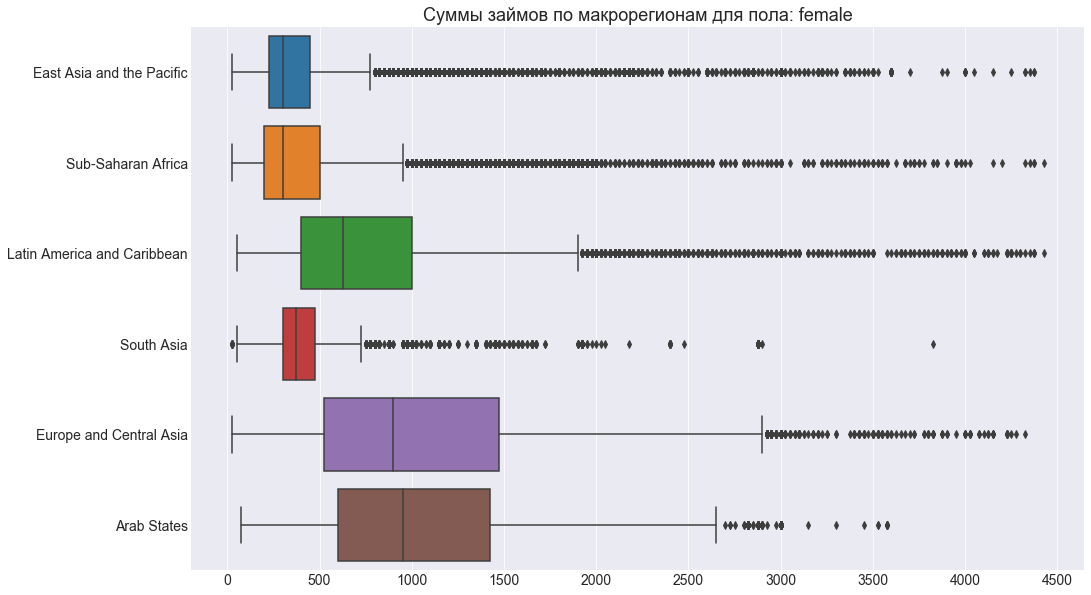

In [54]:
df_kiva_loans_trimmed_gender_data = list(df_kiva_loans_trimmed.groupby('borrower_genders'))[0][1]
df_kiva_loans_trimmed_gender_name = list(df_kiva_loans_trimmed.groupby('borrower_genders'))[0][0]

regions = df_kiva_loans_trimmed_gender_data['world_region'].value_counts().index.to_list()

plt.figure(figsize=(16,10))
plt.title("Суммы займов по макрорегионам для пола: {}".format(df_kiva_loans_trimmed_gender_name), fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="world_region", order=regions, data=df_kiva_loans_trimmed_gender_data)\
    .set(ylabel=None, xlabel=None)
# plt.legend(loc=1, bbox_to_anchor=(1.15, 1), fontsize=16)
plt.show()

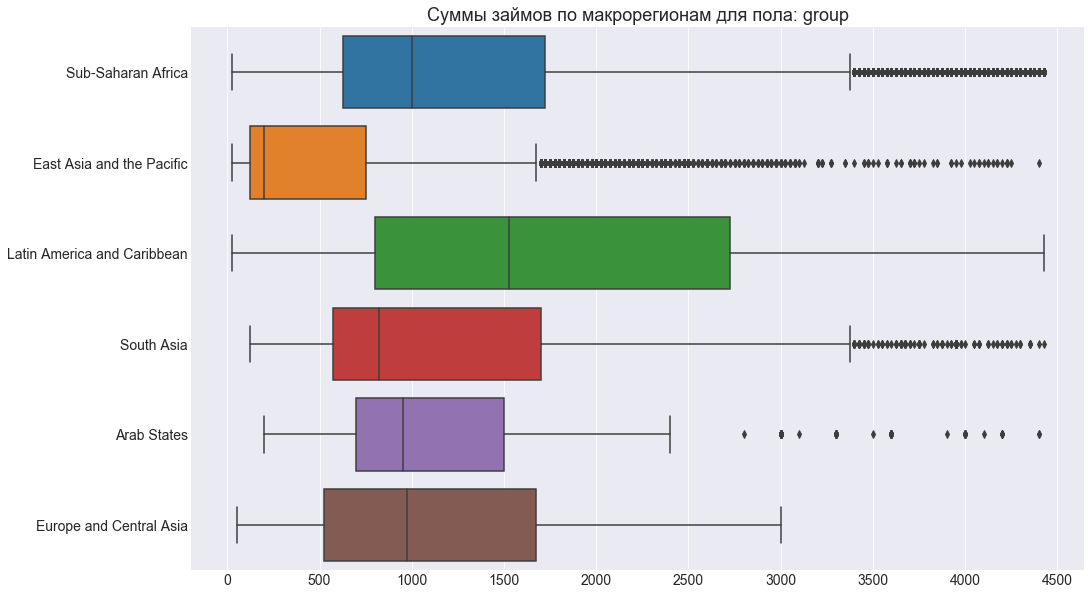

In [55]:
df_kiva_loans_trimmed_gender_data = list(df_kiva_loans_trimmed.groupby('borrower_genders'))[1][1]
df_kiva_loans_trimmed_gender_name = list(df_kiva_loans_trimmed.groupby('borrower_genders'))[1][0]

regions = df_kiva_loans_trimmed_gender_data['world_region'].value_counts().index.to_list()

plt.figure(figsize=(16,10))
plt.title("Суммы займов по макрорегионам для пола: {}".format(df_kiva_loans_trimmed_gender_name), fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="world_region", order=regions, data=df_kiva_loans_trimmed_gender_data)\
    .set(ylabel=None, xlabel=None)
# plt.legend(loc=1, bbox_to_anchor=(1.15, 1), fontsize=16)
plt.show()

Суммы займов по среди мужчин и женщин имеют сильные различия в регионах: Восточная Азия и океания, Сахара и Южная Азия. Суммы займов по группам сильно отличаются от займов одним человеко за исключением Европы и Центральной Азии, и Арабских стран.

**Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения.**

In [86]:
df_MPI = df_loans_dates.copy()
df_MPI['MPI_*100_group'] = pd.cut(df_loans_dates.MPI*100, range(0, 60, 5))

df_MPI_group = df_MPI.copy().groupby('MPI_*100_group')\
    .agg({'loan_amount' : 'median', 'term_in_months' : 'median'}).reset_index()

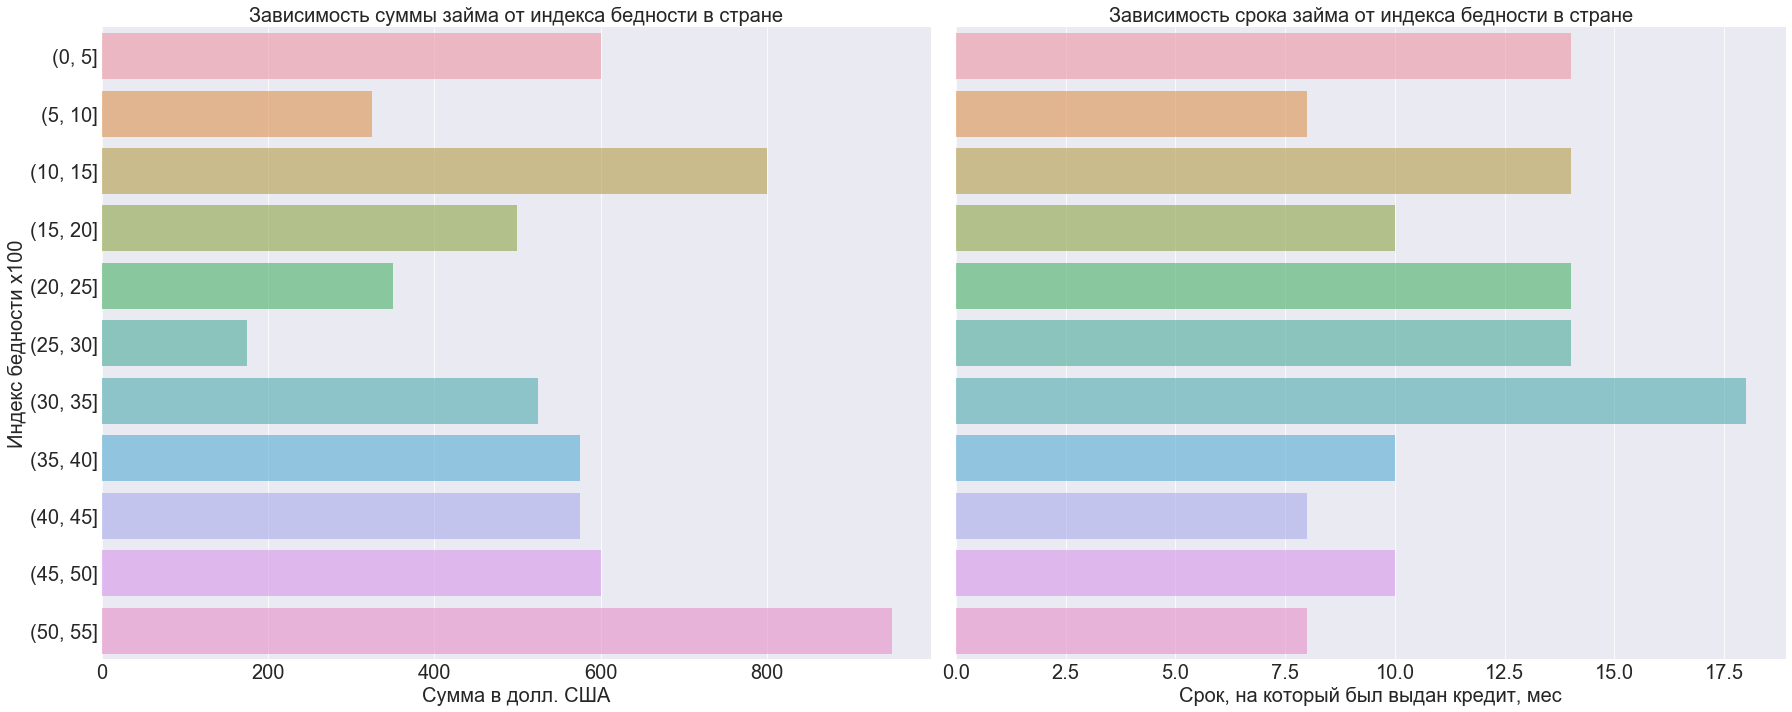

In [89]:
f,ax=plt.subplots(1, 2, sharey=True, figsize=(25,10))

sns.barplot(x=df_MPI_group['loan_amount'], y=df_MPI_group['MPI_*100_group'], ax=ax[0], alpha=0.6)
ax[0].set_title('Зависимость суммы займа от индекса бедности в стране', fontsize=20)
ax[0].set_xlabel('Сумма в долл. США', fontsize=20)
ax[0].set_ylabel('Индекс бедности x100', fontsize=20)
ax[0].tick_params(labelsize=20)

sns.barplot(x=df_MPI_group['term_in_months'], y=df_MPI_group['MPI_*100_group'], ax=ax[1], alpha=0.6)
ax[1].set_title('Зависимость срока займа от индекса бедности в стране', fontsize=20)
ax[1].set_xlabel('Срок, на который был выдан кредит, мес', fontsize=20)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=20)

plt.tight_layout()
plt.show()

Между показателями MPI и суммой займа, и MPI и сроком займа зависимости не наблюдается.

## 2.5. Время ожидания средств

Следующий интересный вопрос, который мы можем задать: как долго им действительно приходится ждать финансирования? К счастью, у нас есть две колонки, которые помогут нам в исследовании:

* **posted_time**: соответствует дате + точный час, когда заявка появилась на сайте.
* **disbursed_time**: соответствует дате + точный час, когда деньги фактически были получены адресатом.

In [56]:
# drop na (missing) values
df_loans_dates = df_kiva_loans_trimmed.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)

# dates columns:
dates = ['posted_time','disbursed_time']

# format dates:
df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x : x.split('+')[0])
df_loans_dates[dates] = df_loans_dates[dates].apply(pd.to_datetime)

# calculate time interval
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['disbursed_time']-df_loans_dates['posted_time']
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['time_funding'] / timedelta(days=1) 

# remove outliers +-3 sigma
dev = (df_loans_dates['time_funding']-df_loans_dates['time_funding'].mean()).abs()
std = df_loans_dates['time_funding'].std()
# Keep rows where time_funding interval > 0 only
df_loans_dates_trimmed = df_loans_dates[~(dev>3*std) & (df_loans_dates.loc[:, 'time_funding']>0)]
df_loans_dates_trimmed.shape[0]

C:\Users\akhud\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\akhud\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\akhud\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

27989

### 2.5.1. Количество дней до полного финансирования заявки

Построим график распределения количества дней до полного финансирования заявки:

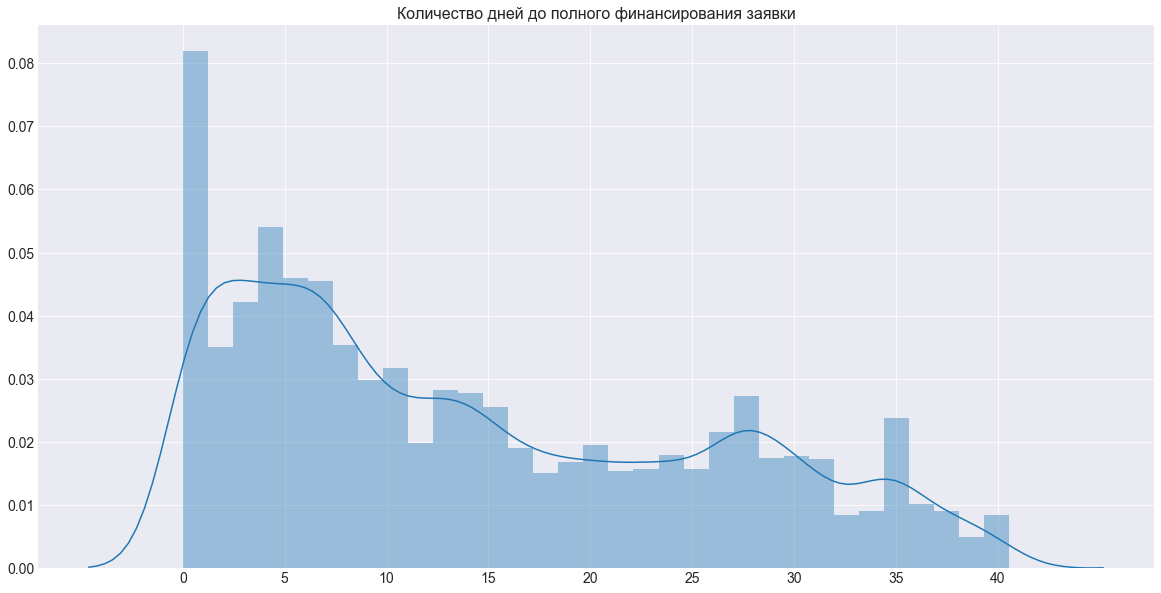

In [57]:
plt.figure(figsize=(20,10))
plt.title("Количество дней до полного финансирования заявки", fontsize=16)
plt.xticks(np.arange(0, max(df_loans_dates_trimmed['time_funding']+1), 5))
plt.tick_params(labelsize=14)

sns.distplot(df_loans_dates_trimmed['time_funding']).set(ylabel=None, xlabel=None)
plt.show()

БОльшая часть заявок финансируется в течение 10 дней.

Однако также очевидно и наличие пиков в районе 27, 35 дней. Это уже может свидетельствовать о том, что часть заявок проходят довольно длительный процесс 
финансирования.

### 2.5.2. Время ожидания и суммы займов 

Для визуализации зависимости суммы займа и временного интервала финансирования давайте построим **тепловую карту**:

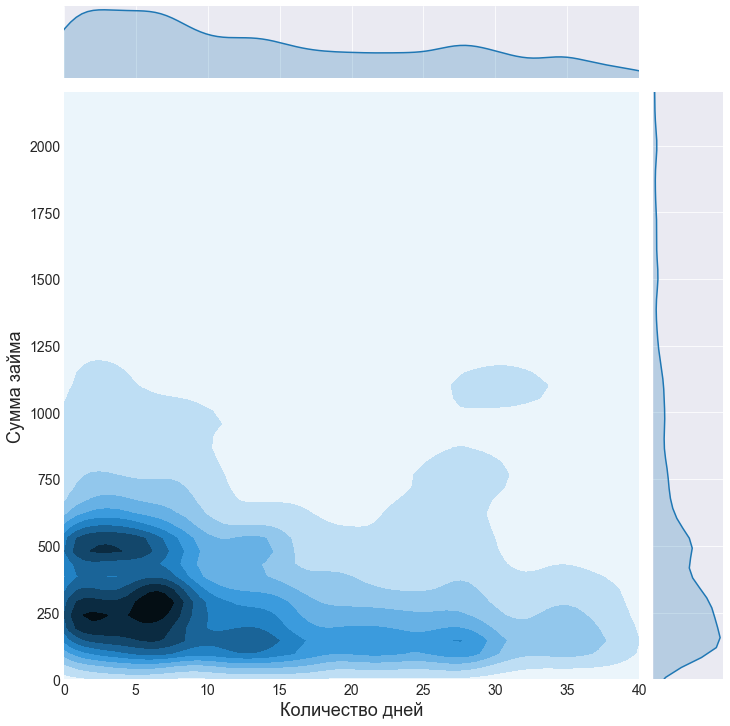

In [58]:
p = sns.jointplot(x="time_funding", y="loan_amount", data=df_loans_dates_trimmed, kind='kde', height=10, ratio=7, xlim=[0,40] , ylim=[0,2200])\
        .set_axis_labels("Количество дней", "Сумма займа", size=18)

# p.ax_joint.set_xticks(np.arange(0, max(df_loans_dates_trimmed['time_funding']+1), 5))
# p.ax_joint.set_yticks(np.arange(0, max(df_loans_dates_trimmed['loan_amount']+1), 250))
p.ax_joint.tick_params(labelsize=14)

plt.show()

На тепловой карте области, выделенные одним цветом, содержат одинаковое количестчо заявок. При этом области с более насыщенными, тёмными цветами содержат бОльшее количество заявок, чем более светлые области.

Действительно, возрастающее количество дней, требуемое для финансирования заявки, можно объяснить возрастающей суммой, но только отчасти.

Также видно наличие большого количества заявок на суммы до **$250** со сроками **20–35** дней.

### 2.5.3. Время ожидания и страны

Проверка наличие смещения интервалов ожидания по странам, то есть предположение о том, что заявки из ряда стран финансируются необоснованно долго в силу тех или иных причин.

In [59]:
df_country_median = df_loans_dates_trimmed.groupby(['world_region', 'country'])\
    .agg({'loan_amount' : 'median', 'time_funding' : 'median', 'term_in_months' : 'median'})\
    .reset_index()

df_country_median = df_country_median[df_country_median.country.isin(list_countries)].sort_values(by='time_funding')

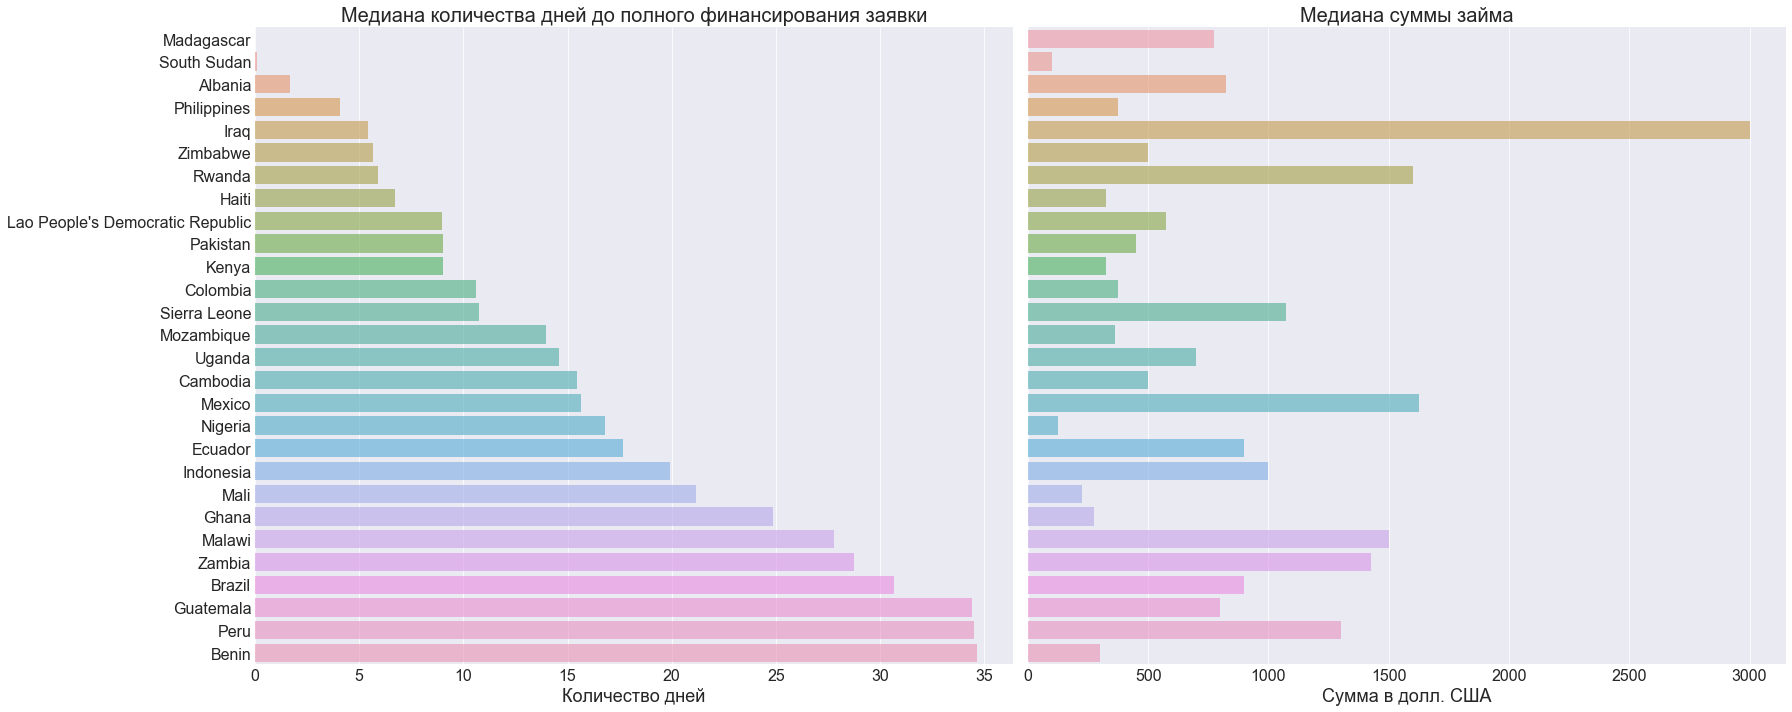

In [60]:
f,ax=plt.subplots(1, 2, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='time_funding', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана количества дней до полного финансирования заявки", fontsize=20)
ax[0].set_xlabel('Количество дней', fontsize=18) 
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

Действительно, прямой связи времени ожидания финансирования и суммой займа не наблюдается.

В ряде стран с довольно большой медианной суммой займа наблюдаются короткие интервалы на сбор средств:

- Либерия: **750** USD — **1** день;
- Руанда: **1600** USD — **5** дней;
- Индия: **1250** USD — **10** дней.

И наоборот, в нескольких странах на сбор относительно небольших сумм требуется длительное время:

- Нигерия: **125** USD — **17** дней;
- Мали: **250** USD — **22** дня;
- Гана: **250** USD — **25** дней.

## 2.6. Сумма кредита и время погашения

У нас есть ещё один интересный разрез датасета — это информация о количестве месяцев, необходимых заёмщикам для погашения своих кредитов.

Простое построение среднего/медианного времени погашения по стране может дать некоторую информацию, однако она может ввести в заблуждение.

Действительно, скажем, в стране **А** кредиты погашаются в среднем через **12** месяцев, а в стране **В** — через 15 месяцев. Ориентируясь на это, можно сказать, что людям в стране **B** в среднем нужно больше времени, чтобы погасить свои кредиты, по сравнению с людьми в стране **A**. 

Теперь давайте предположим, что средняя сумма кредитов в стране **A** составляет **500** долларов, тогда как в стране **B** это **800** долларов, тогда это означает, что люди в стране **А** платят **41,66** в месяц, в то время как люди в стране **B** платят **51,33**  в месяц!

Поэтому более важно **соотношение суммы кредита и времени погашения**. Оно даёт представление о том, сколько денег в месяц человек в данной стране может позволить себе тратить на погашение кредитов.

Теперь рассчитаем сумму ежемесячного платежа в разрезе стран:

In [61]:
df_country_median = df_country_median.sort_values(by='term_in_months')

In [62]:
df_country_median['monthly_repayment'] = df_country_median['loan_amount'] / df_country_median['term_in_months']
df_country_median.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 44 to 26
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   world_region       28 non-null     object 
 1   country            28 non-null     object 
 2   loan_amount        28 non-null     float64
 3   time_funding       28 non-null     float64
 4   term_in_months     28 non-null     float64
 5   monthly_repayment  28 non-null     float64
dtypes: float64(4), object(2)
memory usage: 1.5+ KB


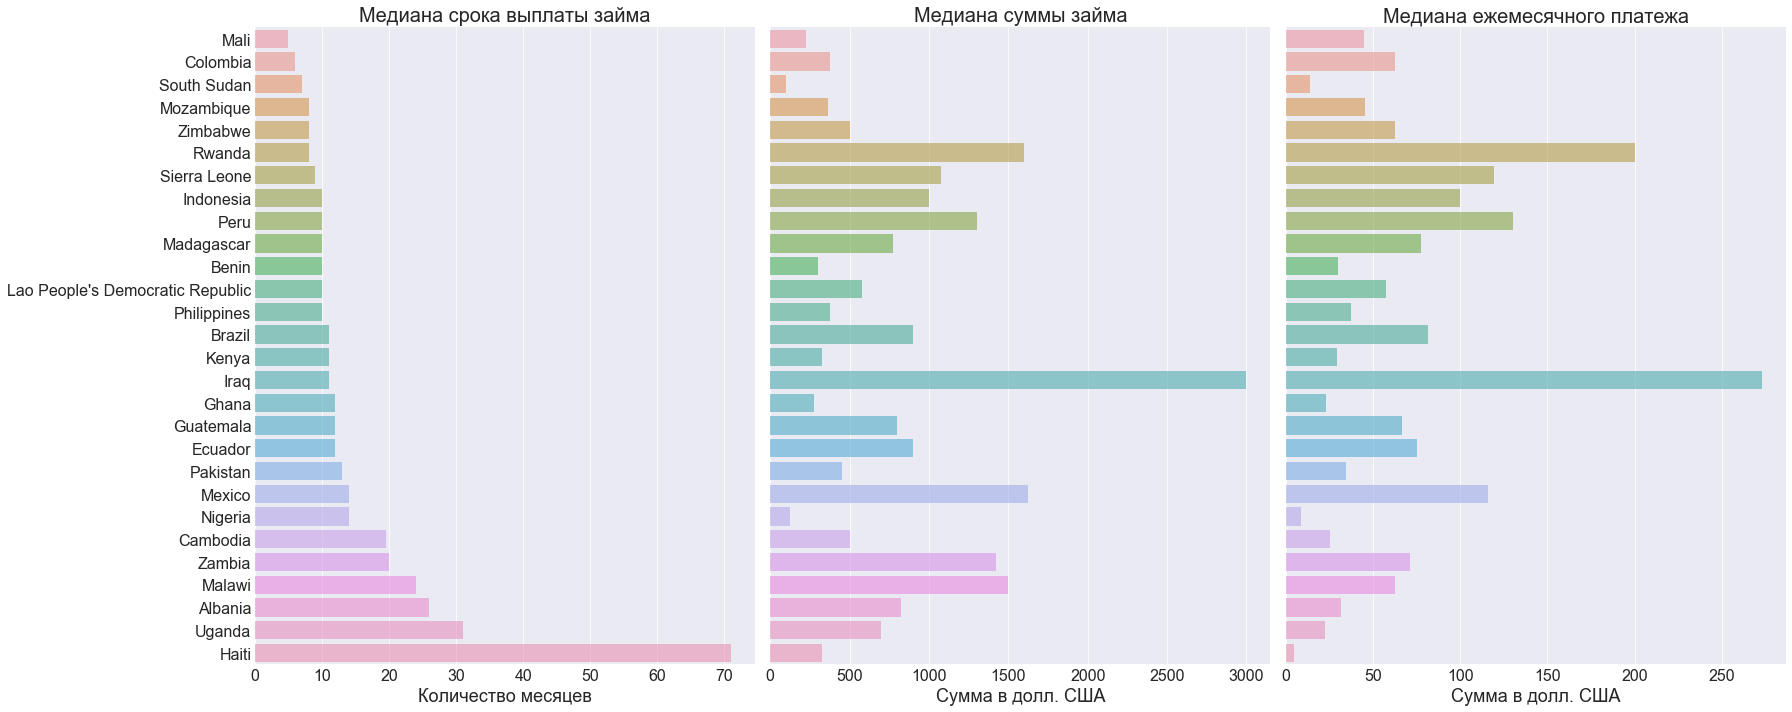

In [63]:
f,ax=plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='term_in_months', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана срока выплаты займа", fontsize=20)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y='country', x='monthly_repayment', data=df_country_median, alpha=0.6, ax=ax[2])
ax[2].set_title("Медиана ежемесячного платежа", fontsize=20)
ax[2].set_xlabel('Сумма в долл. США', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

Перед нами наглядное представление о рейтинге беднейших стран, люди из которых пользуются платформой Kiva. Это страны, в которых люди могут позволить себе выплачивать суммы значительно меньшие, чем в других странах, — а значит, и уровень бедности там выше.

- Гаити;
- Нигерия;
- Киргизия;
- Уганда;
- Гана.

Как никогда стоит обратить внимание сообщества Kiva и направить усилия на поддержку самых нуждающихся!

## 2.7. Взаимозависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж» в разрезе макрорегионов.

In [90]:
df_world_region_median = df_kiva_loans_trimmed.groupby(['world_region'])\
    .agg({'loan_amount' : 'median', 'term_in_months' : 'median'}).reset_index()

df_world_region_median['monthly_repayment'] = df_world_region_median['loan_amount'] / df_world_region_median['term_in_months']

In [99]:
df_loans_dates_trimmed = df_loans_dates[~(dev>3*std) & (df_loans_dates.loc[:, 'time_funding']>0)]

df_world_region_median_trimmed = df_loans_dates_trimmed.groupby('world_region')\
    .agg({'loan_amount' : 'median', 'term_in_months' : 'median', 'time_funding' : 'median'}).reset_index()
df_world_region_median_trimmed['monthly_repayment'] = df_world_region_median_trimmed['loan_amount']\
/ df_world_region_median_trimmed['term_in_months']

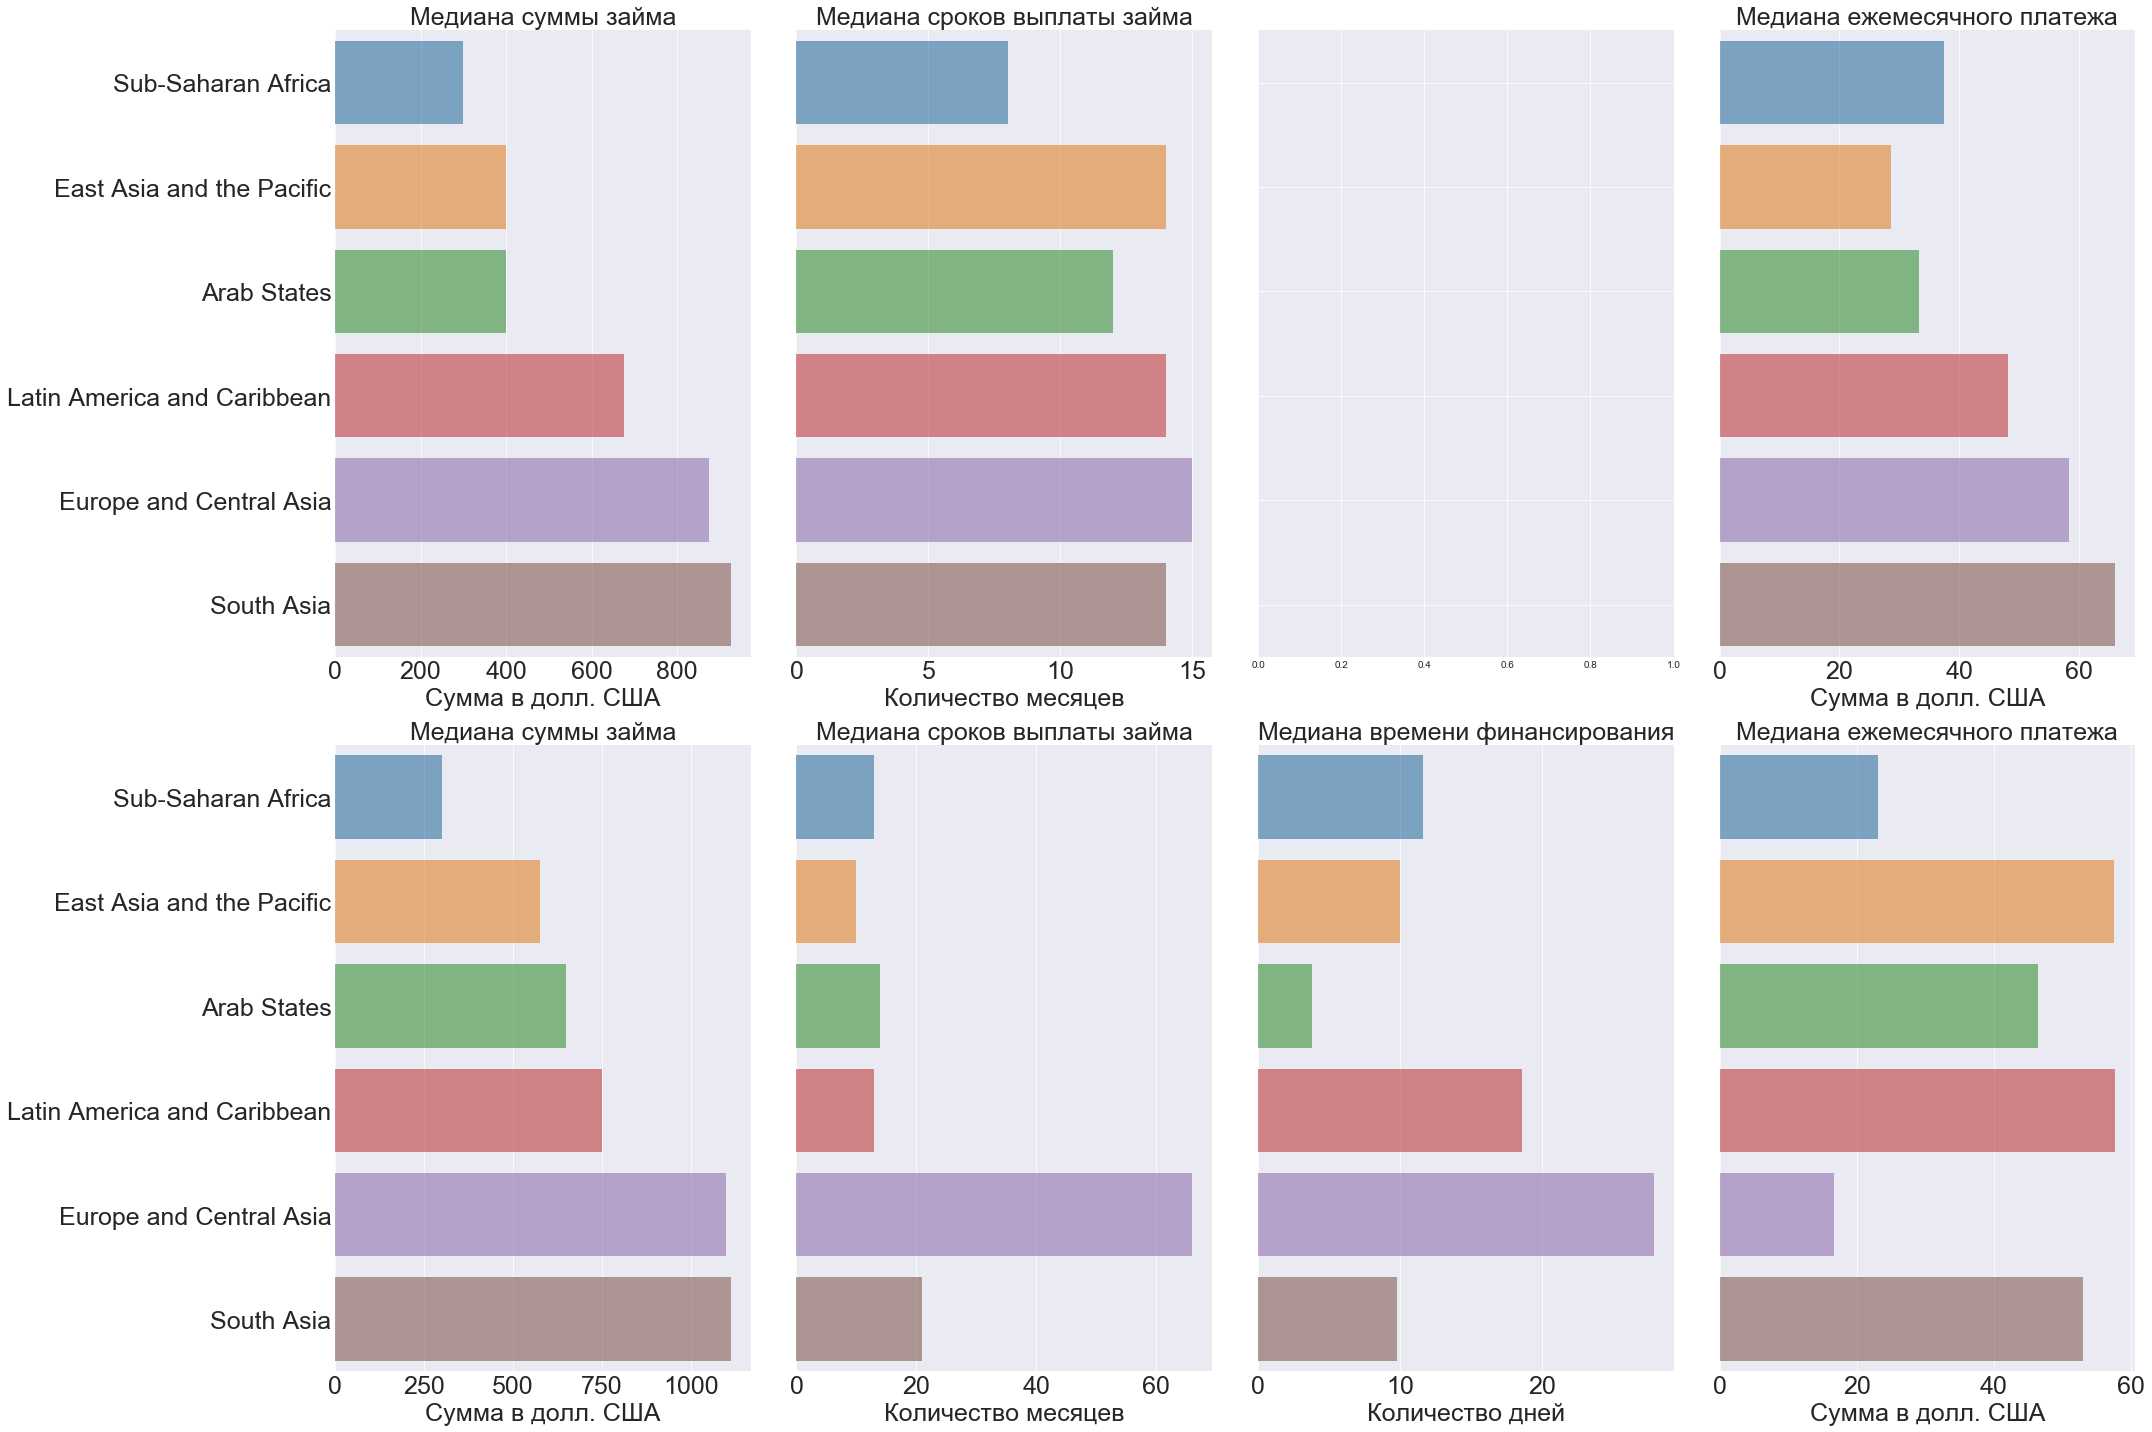

In [100]:
df_world_region_median.sort_values('loan_amount', inplace=True)
df_world_region_median_trimmed.sort_values('loan_amount', inplace=True)

f,ax=plt.subplots(2, 4, sharey=True, figsize=(30,20))

sns.barplot(y='world_region', x='loan_amount', data=df_world_region_median, alpha=0.6, ax=ax[0, 0])
ax[0, 0].set_title("Медиана суммы займа", fontsize=25)
ax[0, 0].set_xlabel('Сумма в долл. США', fontsize=25)
ax[0, 0].set_ylabel(None)
ax[0, 0].tick_params(labelsize=25)

sns.barplot(y='world_region', x='term_in_months', data=df_world_region_median, alpha=0.6, ax=ax[0, 1])
ax[0, 1].set_title("Медиана сроков выплаты займа", fontsize=25)
ax[0, 1].set_xlabel('Количество месяцев', fontsize=25)
ax[0, 1].set_ylabel(None)
ax[0, 1].tick_params(labelsize=25)

sns.barplot(y='world_region', x='monthly_repayment', data=df_world_region_median, alpha=0.6, ax=ax[0, 3])
ax[0, 3].set_title("Медиана ежемесячного платежа", fontsize=25)
ax[0, 3].set_xlabel('Сумма в долл. США', fontsize=25)
ax[0, 3].set_ylabel(None)
ax[0, 3].tick_params(labelsize=25)

sns.barplot(y='world_region', x='loan_amount', data=df_world_region_median_trimmed, alpha=0.6, ax=ax[1, 0])
ax[1, 0].set_title("Медиана суммы займа", fontsize=25)
ax[1, 0].set_xlabel('Сумма в долл. США', fontsize=25)
ax[1, 0].set_ylabel(None)
ax[1, 0].tick_params(labelsize=25)

sns.barplot(y='world_region', x='term_in_months', data=df_world_region_median_trimmed, alpha=0.6, ax=ax[1, 1])
ax[1, 1].set_title("Медиана сроков выплаты займа", fontsize=25)
ax[1, 1].set_xlabel('Количество месяцев', fontsize=25)
ax[1, 1].set_ylabel(None)
ax[1, 1].tick_params(labelsize=25)

sns.barplot(y='world_region', x='time_funding', data=df_world_region_median_trimmed, alpha=0.6, ax=ax[1, 2])
ax[1, 2].set_title("Медиана времени финансирования", fontsize=25)
ax[1, 2].set_xlabel('Количество дней', fontsize=25)
ax[1, 2].set_ylabel(None)
ax[1, 2].tick_params(labelsize=25)

sns.barplot(y='world_region', x='monthly_repayment', data=df_world_region_median_trimmed, alpha=0.6, ax=ax[1, 3])
ax[1, 3].set_title("Медиана ежемесячного платежа", fontsize=25)
ax[1, 3].set_xlabel('Сумма в долл. США', fontsize=25)
ax[1, 3].set_ylabel(None)
ax[1, 3].tick_params(labelsize=25)

plt.tight_layout()
plt.show()

Из-за того что были исключены заявки для которых средства сначала фактически выдаются агентами на местах и только потом публикуются на сайте, в выборке осталось 5% данных. Анализ данной выборки бы сильно исказил действительность. 

Поэтому было решено использовать 2 выборки: первая (первый ряд) включает выборку по правилу трех сигм, вторая (втрой ряд) исключает также данные с отрицательным временем финансирования.

Суммы займа из ряда 1 не сильно отличаюся от сумм из ряда 2 (что подтверждает заключение из пункта 2.5.2).

1. Время ожидания в Латинской Амиерике, Европе и Центральной Азии Значительно выше чем в других регионах.
3. Если деньги выдаются не сразу, а после рассмотрения заявки, то наблюдается сильное неравенство по сумме ежемесячного платежа. Это связано с тем, что в Европе срок погшения кредита гораздо выше. Возможно, следует давать деньги взайм для развивающихся регионов на больший срок, чтобы снизить нагрузку по выплате кредита для занимателей.

# 3. Результаты и выводы
***

Пора подвести основные итоги и сделать выводы, которые могут быть полезны и интересны не только организаторам платформы Kiva, но и всему сообществу неравнодушных людей, которые стремятся сделать этот мир немного лучше.

- Прежде всего необходимо отметить очень важную и знаменательную роль площадки Kiva и её сообщества. Для большого числа людей в совершенно разных частях нашей планеты Kiva играет важнейшую роль в части **поддержки операционной и хозяйственной деятельности**, активно дополняя, а часто выступая в роли частного банковского сектора.
- В каждый момент времени стоит оказывать **адресную помощь** странам и регионам, которые больше всего **недофинансированы** относительно других. Это страны с высоким уровнем бедности, в которых люди могут позволить себе выплачивать суммы значительно мЕньшие, чем в других странах. Как никогда стоит обратить внимание сообщества Kiva и направить усилия на **поддержку самых нуждающихся**! Такие заявки могут быть отражены в отдельных категориях и включать призывы в свои заголовки: *Неотложные нужды, Срочно, Истекает срок финансирования*.
- Используя положительный опыт Филиппин, стоит стимулировать рост выдачи небольших по сумме и сроку погашения займов, которые обеспечат **бОльшую занятость** населения и рост **деловой активности**. По возможности, стоит делить заявки из небогатых стран на небольшие и короткие займы, каждый из которых будет очередным маленьким шагом в большом деле.
- Когда дело касается возможностей для развития человека — границы между мужчинами и женщинами стираются. Стоит стремиться к обеспечению доступа к финансированию для **женщин и мужчин в равной степени** и обратить внимание на те страны и регионы, где пока этот баланс нарушен. Например, для таких стран, как Самоа, Либерия, Того, выводить на главную страницу сначала займы от мужчин. Отличным шагом станет публикация личных историй и примеров женщин и мужчин, например, в **интернет-издательствах**, на **блогинг-платформах**, таких как medium.com, а также в видеоблоге Kiva на youtube.com.
- Приоритетными должны становиться заявки, направленные на развитие отраслей с **высокой добавленной стоимостью и стимулированием производств**, так как они являются движущей силой и по цепочке начинают задействовать другие отрасли. А именно **строительство, производство, лёгкая промышленность**. Здесь очень кстати будет использование **умных рекомендательных систем** на сайте  Kiva.org, которые с бОльшей вероятностью будут подсказывать такие заявки.
- Всё ещё довольна высока доля заявок, направленных на удовлетворение самых **базовых человеческих потребностей**. Такие просьбы не должны оставаться незамеченными, но быть первыми кандидатами на главной странице. Недопустимы такие ситуации, когда, например, в Нигерии люди ждут жизненно важную чистую воду по 10 дней. Дайджест таких заявок можно включать в **регулярные почтовые рассылки** всем участникам сообщества Kiva, когда-либо принимавшим участие в финансировании проектов.
- Финансирование заявок на **крупные суммы** и **долгосрочные проекты** тоже работает. Для части стран возможность использовать Kiva будет играть решающую роль в формировании и реализации инфраструктурных и системообразующих проектов.
- Для ряда регионов и стран присутствия, таких как **Южная Азия**, в частности **Пакистан** и **Индия**, есть отличные перспективы для расширения присутствия и деятельности со стороны сообщества Kiva.
- Нередки случаи **проявлений неравенства между странами**, таких как, например, длительные ожидания финансирования для части заявок с совсем небольшими суммами. Мы уверены, что в силах организаторов платформы Kiva и сообщества **сглаживать такие явные неравенства**, регулируя результаты поисковой выдачи, наполнение рассылок и рекомендуемых заявок для участников сообщества.

- В целом, сумма займа пропорциональна количеству кредиторов. Это говорит о том, что подавляющее большинство кредиторов вносят деньги в kiva небольшими суммами. Зависимсоть срока кредита от количества кредиторов прослеживается лишь при количестве кредиторов больше 150.

-  К регионам, пользователи которых в большинетсве представлены женщинами, относятся: Южная, восточная Азия, Океания, Европа и Центральная Азия. Наиболее популярны сектора экномики среди женщин это: швейная, пищевая промышленности, розничная торговля и сфера обслуживания. Также популярна сфера образования.  Почти во всех регионах на первом месте стоит швейная промышленность.

- Среди мужчин Kiva наиболее популярен в Арабских странах и в Африке. В половине регионов на первом месте среди мужчин стоит образование. Так же следует выделить сферу жилищного строительства, сельского хозяйства и личного использования.

- В целом, сумма займа пропорциональна количеству кредиторов. Это говорит о том, что подавляющее большинство кредиторов вносят деньги в kiva небольшими суммами. Зависимсоть срока кредита от количества кредиторов прослеживается лишь при количестве кредиторов больше 150.

- Между показателями MPI и суммой займа, и MPI и сроком займа зависимости не наблюдается.

- Время ожидания в Латинской Амиерике, Европе и Центральной Азии Значительно выше чем в других регионах.

- Если средства выдаются не сразу, а после рассмотрения заявки, то наблюдается сильное неравенство по сумме ежемесячного платежа. Это связано с тем, что в Европе срок погшения кредита гораздо выше. Возможно, следует давать средства взайм для развивающихся регионов на больший срок, чтобы снизить нагрузку по выплате кредита для занимателей.
-  К регионам, пользователи которых в большинетсве представлены женщинами, относятся: Южная, восточная Азия, Океания, Европа и Центральная Азия. Наиболее популярны сектора экномики среди женщин это: швейная, пищевая промышленности, розничная торговля и сфера обслуживания. Также популярна сфера образования.  Почти во всех регионах на первом месте стоит швейная промышленность.

- Между показателями MPI и суммой займа, и MPI и сроком займа зависимости не наблюдается.

- Среди мужчин Kiva наиболее популярен в Арабских странах и в Африке. В половине регионов на первом месте среди мужчин стоит образование. Так же следует выделить сфепру жилищного строительства, сельского хозяйства и личного использования.
- В целом, сумма займа пропорциональна количеству кредиторов. Это говорит о том, что подавляющее большинство кредиторов вносят деньги в kiva небольшими суммами.
- зависимсоть срока кредита от количества кредиторов прослеживается лишь при количестве кредиторов больше 150.
- Время ожидания в Латинской Амиерике, Европе и Центральной Азии Значительно выше чем в других регионах.
- Если деньги выдаются не сразу, а после рассмотрения заявки, то наблюдается сильное неравенство по сумме ежемесячного платежа. Это связано с тем, что в Европе срок погшения кредита гораздо выше. Возможно, следует давать деньги взайм для развивающихся регионов на больший срок, чтобы снизить нагрузку по выплате кредита для занимателей.